In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import os

# Mounting the Google Drive for getting access to input and output folders
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the data
data = pd.read_csv('/content/drive/MyDrive/Dissertation Aditya Parmar : testing of Large Lang. Model/100-Gemini-1.5-pro_withManual_metrics_output.csv')


In [ ]:
# Displaying column names
print("Available columns:")
print(data.columns.tolist())

# Using a function to calculate percentage above threshold
def percentage_above_threshold(series, threshold):
    return (series > threshold).mean() * 100

# Function to calculate percentage below threshold
def percentage_below_threshold(series, threshold):
    return (series < threshold).mean() * 100

# Calculating metrics
total_images = len(data)
ssim_above_085 = percentage_above_threshold(data['SSIM'], 0.85)
ssim_above_075 = percentage_above_threshold(data['SSIM'], 0.75)
ssim_above_065 = percentage_above_threshold(data['SSIM'], 0.65)
clip_above_085 = percentage_above_threshold(data['CLIP'], 0.85)
clip_above_075 = percentage_above_threshold(data['CLIP'], 0.75)
clip_above_065 = percentage_above_threshold(data['CLIP'], 0.65)
pixel_below_15 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 15)
pixel_below_25 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 25)
pixel_below_35 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 35)

# Identifing manual evaluation columns
manual_columns = [col for col in data.columns if col.startswith('Manual_')]

# Calculating average manual scores
manual_averages = data[manual_columns].mean()

# Creating summary table
summary_data = {
    'Metric': [
        'SSIM > 0.85', 'SSIM > 0.75', 'SSIM > 0.65',
        'CLIP > 0.85', 'CLIP > 0.75', 'CLIP > 0.65',
        'PixelMatch Diff < 15%', 'PixelMatch Diff < 25%', 'PixelMatch Diff < 35%'
    ] + manual_columns,
    'Value': [
        f"{ssim_above_085:.2f}%", f"{ssim_above_075:.2f}%", f"{ssim_above_065:.2f}%",
        f"{clip_above_085:.2f}%", f"{clip_above_075:.2f}%", f"{clip_above_065:.2f}%",
        f"{pixel_below_15:.2f}%", f"{pixel_below_25:.2f}%", f"{pixel_below_35:.2f}%"
    ] + [f"{score:.2f}" for score in manual_averages]
}

summary_data = pd.DataFrame(summary_data)

# Displaying the summary table
print("\nSummary Table:")
print(summary_data.to_string(index=False))
print(f"\nTotal images analyzed: {total_images}")

# Optional: Save the summary table as a CSV file
summary_data.to_csv('image_metrics_summary_with_manual.csv', index=False)
print("\nSummary table saved as 'image_metrics_summary_with_manual.csv'")

# Additional analysis: Correlation between automated and manual metrics
auto_metrics = ['SSIM', 'PixelMatch_DiffPercentage', 'CLIP']
correlation_matrix = data[auto_metrics + manual_columns].corr()

print("\nCorrelation between automated and manual metrics:")
print(correlation_matrix[auto_metrics][manual_columns].to_string())

Available columns:
['Image Name', 'SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid', 'Semantic_Precision', 'Semantic_Recall', 'Manual_Content_Accuracy ', 'Manual_Layout_Structure', 'Manual_Styling', 'Manual_Functionality_Indicators', 'Manual_Visual_Elements']

Summary Table:
                         Metric  Value
                    SSIM > 0.85  8.33%
                    SSIM > 0.75 40.62%
                    SSIM > 0.65 70.83%
                    CLIP > 0.85  2.08%
                    CLIP > 0.75 28.12%
                    CLIP > 0.65 61.46%
          PixelMatch Diff < 15% 29.17%
          PixelMatch Diff < 25% 50.00%
          PixelMatch Diff < 35% 60.42%
       Manual_Content_Accuracy    3.92
        Manual_Layout_Structure   3.45
                 Manual_Styling   3.67
Manual_Functionality_Indicators   3.65
         Manual_Visual_Elements   3.47

Total images analyzed: 96

Summary table saved as 'image_metrics_summary_with_manual.csv'

Correlation between automated and manua

KeyError: "None of [Index(['Manual_Content_Accuracy ', 'Manual_Layout_Structure', 'Manual_Styling',\n       'Manual_Functionality_Indicators', 'Manual_Visual_Elements'],\n      dtype='object')] are in the [columns]"

In [ ]:
data.sample(30)

,Image Name,SSIM,PixelMatch_DiffPercentage,CLIP,HTML_Valid,Semantic_Precision,Semantic_Recall,Manual_Content_Accuracy,Manual_Layout_Structure,Manual_Styling,Manual_Functionality_Indicators,Manual_Visual_Elements
74,sketch_105,0.601124,24.570955,0.609492,True,0.000000,0.000000,4,3,4,3,3
3,sketch_131,0.693628,11.329404,0.723289,True,0.000000,0.000000,4,4,5,4,3
35,fleetnews.co.uk,0.787889,11.563409,0.711034,False,0.000000,0.000000,1,1,1,1,1
60,flare.com,0.610851,31.703158,0.666558,True,0.000000,0.000000,3,3,4,3,3
19,D74EB2E6-A862-45E8-A4B3-2103E54D8487,0.827545,10.411111,0.763574,True,0.027027,0.142857,4,3,4,5,4
79,sketch_158,0.719849,41.494437,0.639069,True,0.200000,1.000000,5,3,5,3,4
68,9FED117B-BEB3-4DED-876F-9280B776F8AA,0.902017,6.829499,0.615106,True,0.055556,0.142857,4,4,4,3,4
45,fcn.de,0.429299,92.919728,0.653975,True,0.122222,1.571429,2,3,3,4,3
8,eppgroup.eu,0.646127,36.980149,0.458518,False,0.000000,0.000000,1,1,1,1,1
24,67C7A591-4BB3-4A35-9493-F852B2AC3A6A,0.838372,11.861081,0.741694,True,0.063830,0.428571,5,3,5,5,4


Column names in the dataset:
Index(['Image Name', 'SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid',
       'Semantic_Precision', 'Semantic_Recall', 'Manual_Content_Accuracy ',
       'Manual_Layout_Structure', 'Manual_Styling',
       'Manual_Functionality_Indicators', 'Manual_Visual_Elements'],
      dtype='object')

Column info after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SSIM                             96 non-null     float64
 1   PixelMatch_DiffPercentage        96 non-null     float64
 2   CLIP                             96 non-null     float64
 3   HTML_Valid                       96 non-null     int64  
 4   Semantic_Precision               96 non-null     float64
 5   Semantic_Recall                  96 non-null     float64
 6   Manual_Content_Accuracy          96 n

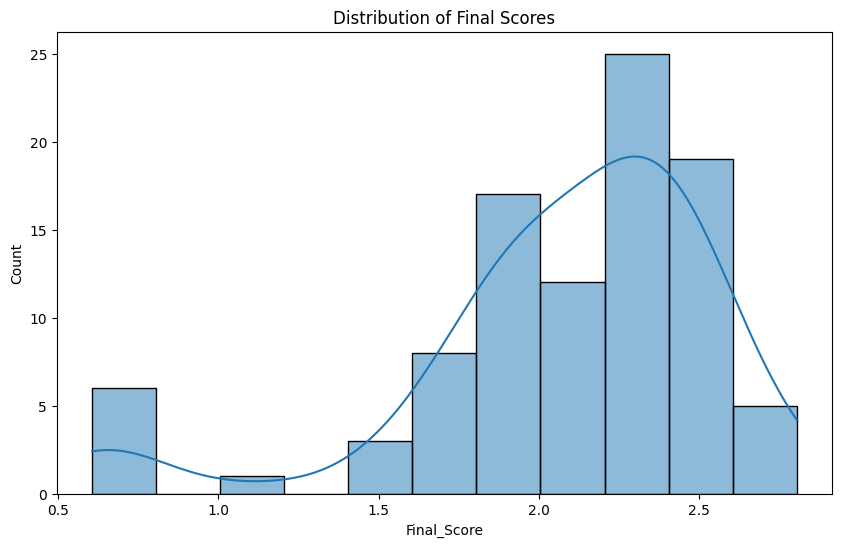


Conclusions and Insights:
1. Correlation between automatic and manual metrics: [Your observations]
2. Significant relationships identified: [Your insights]
3. Performance across different types of images/websites: [Your analysis]
4. Strengths and weaknesses of GPT-4 in HTML/CSS generation: [Your conclusions]
5. Recommendations for improvement: [Your suggestions]


In [ ]:


# Printing column names to verify
print("Column names in the dataset:")
print(data.columns)

# List of automatic and manual metrics (adjusted for potential spaces)
auto_metrics = ['SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid', 'Semantic_Precision', 'Semantic_Recall']
manual_metrics = ['Manual_Content_Accuracy ', 'Manual_Layout_Structure', 'Manual_Styling',
                  'Manual_Functionality_Indicators', 'Manual_Visual_Elements']

# Verifing if all columns exist
missing_columns = [col for col in auto_metrics + manual_metrics if col not in data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # Remove missing columns from the lists
    auto_metrics = [col for col in auto_metrics if col in data.columns]
    manual_metrics = [col for col in manual_metrics if col in data.columns]

# Converting HTML_Valid to numeric
# Converting the values to strings and then apply the mapping
# Converting the values to strings, strip spaces, and then apply the mapping
data['HTML_Valid'] = data['HTML_Valid'].astype(str).str.strip().str.upper().map({'TRUE': 1, 'FALSE': 0}).fillna(0)




# Function to safely convert to numeric
def safe_numeric_convert(series):
    return pd.to_numeric(series, errors='coerce')

# Applying safe conversion to all metrics
for col in auto_metrics + manual_metrics:
    data[col] = safe_numeric_convert(data[col])

# Printing info about the converted columns
print("\nColumn info after conversion:")
data[auto_metrics + manual_metrics].info()

# Normalising automatic metrics
for col in ['SSIM', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']:
    data[f'{col}_norm'] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

data['PixelMatch_norm'] = 1 - (data['PixelMatch_DiffPercentage'] - data['PixelMatch_DiffPercentage'].min()) / (data['PixelMatch_DiffPercentage'].max() - data['PixelMatch_DiffPercentage'].min())

# Calculating average scores
norm_columns = ['SSIM_norm', 'PixelMatch_norm', 'CLIP_norm', 'HTML_Valid', 'Semantic_Precision_norm', 'Semantic_Recall_norm']
data['Auto_Score'] = data[norm_columns].mean(axis=1)
data['Manual_Score'] = data[manual_metrics].mean(axis=1)

# Calculating final combined score
data['Final_Score'] = (data['Auto_Score'] + data['Manual_Score']) / 2

# Verifing Final_Score
print("\nFinal_Score info:")
print(data['Final_Score'].describe())

# 8. Top and bottom performers
print("\nTop 5 Performers:")
print(data.nlargest(5, 'Final_Score')[['Image Name', 'Final_Score']])
print("\nBottom 5 Performers:")
print(data.nsmallest(5, 'Final_Score')[['Image Name', 'Final_Score']])


# Correlation matrix heatmap
print(data['Final_Score'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['Final_Score'], kde=True)
plt.title('Distribution of Final Scores')
plt.show()


# Continue with the rest of the analysis
print("\nConclusions and Insights:")
print("1. Correlation between automatic and manual metrics: [Your observations]")
print("2. Significant relationships identified: [Your insights]")
print("3. Performance across different types of images/websites: [Your analysis]")
print("4. Strengths and weaknesses of GPT-4 in HTML/CSS generation: [Your conclusions]")
print("5. Recommendations for improvement: [Your suggestions]")

In [ ]:
data.sample(30)

,Image Name,SSIM,PixelMatch_DiffPercentage,CLIP,HTML_Valid,Semantic_Precision,Semantic_Recall,Manual_Content_Accuracy,Manual_Layout_Structure,Manual_Styling,Manual_Functionality_Indicators,Manual_Visual_Elements,SSIM_norm,CLIP_norm,Semantic_Precision_norm,Semantic_Recall_norm,PixelMatch_norm,Auto_Score,Manual_Score,Final_Score
47,rw_639,0.837178,29.158029,0.706954,1,0.000000,0.000000,5,3,3,5,4,0.925731,0.685153,0.000000,0.000000,0.737736,0.558104,4.0,2.279052
91,8BB40A0D-A390-45B6-AAE3-0A104D06F8C0,0.892472,9.832729,0.796688,1,0.000000,0.000000,5,4,4,3,4,0.989066,0.845286,0.000000,0.000000,0.961334,0.632614,4.0,2.316307
37,rw_726,0.639663,87.079677,0.759095,0,0.000000,0.000000,3,4,4,4,3,0.699493,0.778200,0.000000,0.000000,0.067571,0.257544,3.6,1.928772
86,rw_109,0.784483,68.297447,0.776012,1,0.074074,0.285714,3,4,3,3,3,0.865373,0.808388,0.370370,0.181818,0.284885,0.585139,3.2,1.892570
61,rw_920,0.775093,17.446140,0.883386,1,0.000000,0.000000,5,3,4,3,4,0.854618,1.000000,0.000000,0.000000,0.873245,0.621311,3.8,2.210655
92,etrazodone.com,0.666690,26.081218,0.597595,1,0.036697,0.571429,5,4,4,3,5,0.730451,0.490000,0.183486,0.363636,0.773336,0.590152,4.2,2.395076
69,sketch_59,0.801503,47.099440,0.775960,1,0.000000,0.000000,3,3,4,4,3,0.884869,0.808295,0.000000,0.000000,0.530150,0.537219,3.4,1.968610
84,sketch_140,0.557905,14.350329,0.666951,1,0.000000,0.000000,4,4,5,3,5,0.605845,0.613767,0.000000,0.000000,0.909065,0.521446,4.2,2.360723
83,rw_713,0.730503,72.453137,0.559148,1,0.000000,0.000000,3,3,4,4,3,0.803543,0.421389,0.000000,0.000000,0.236803,0.410289,3.4,1.905145
15,rw_233,0.690006,59.584036,0.637751,0,0.000000,0.000000,4,3,3,3,3,0.757157,0.561659,0.000000,0.000000,0.385701,0.284086,3.2,1.742043


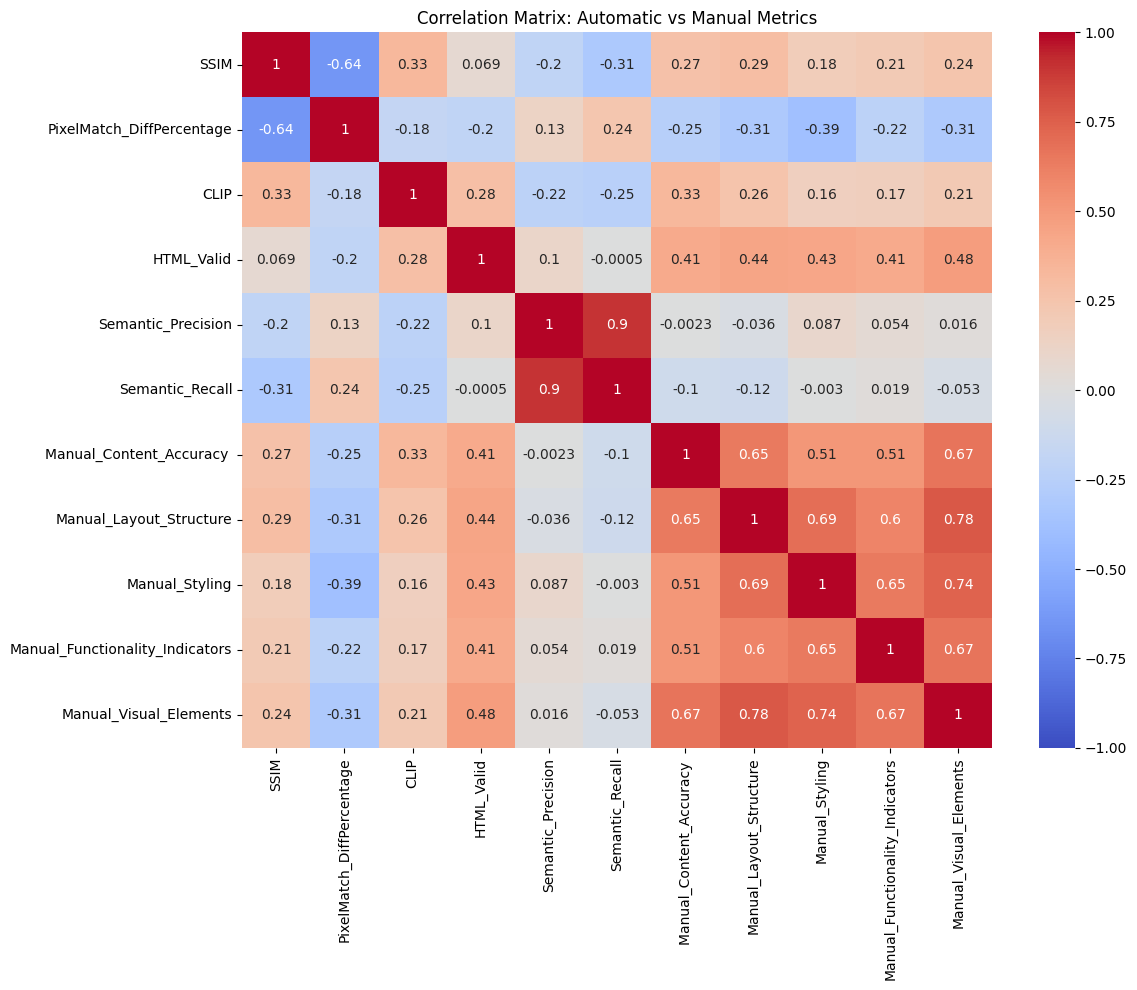

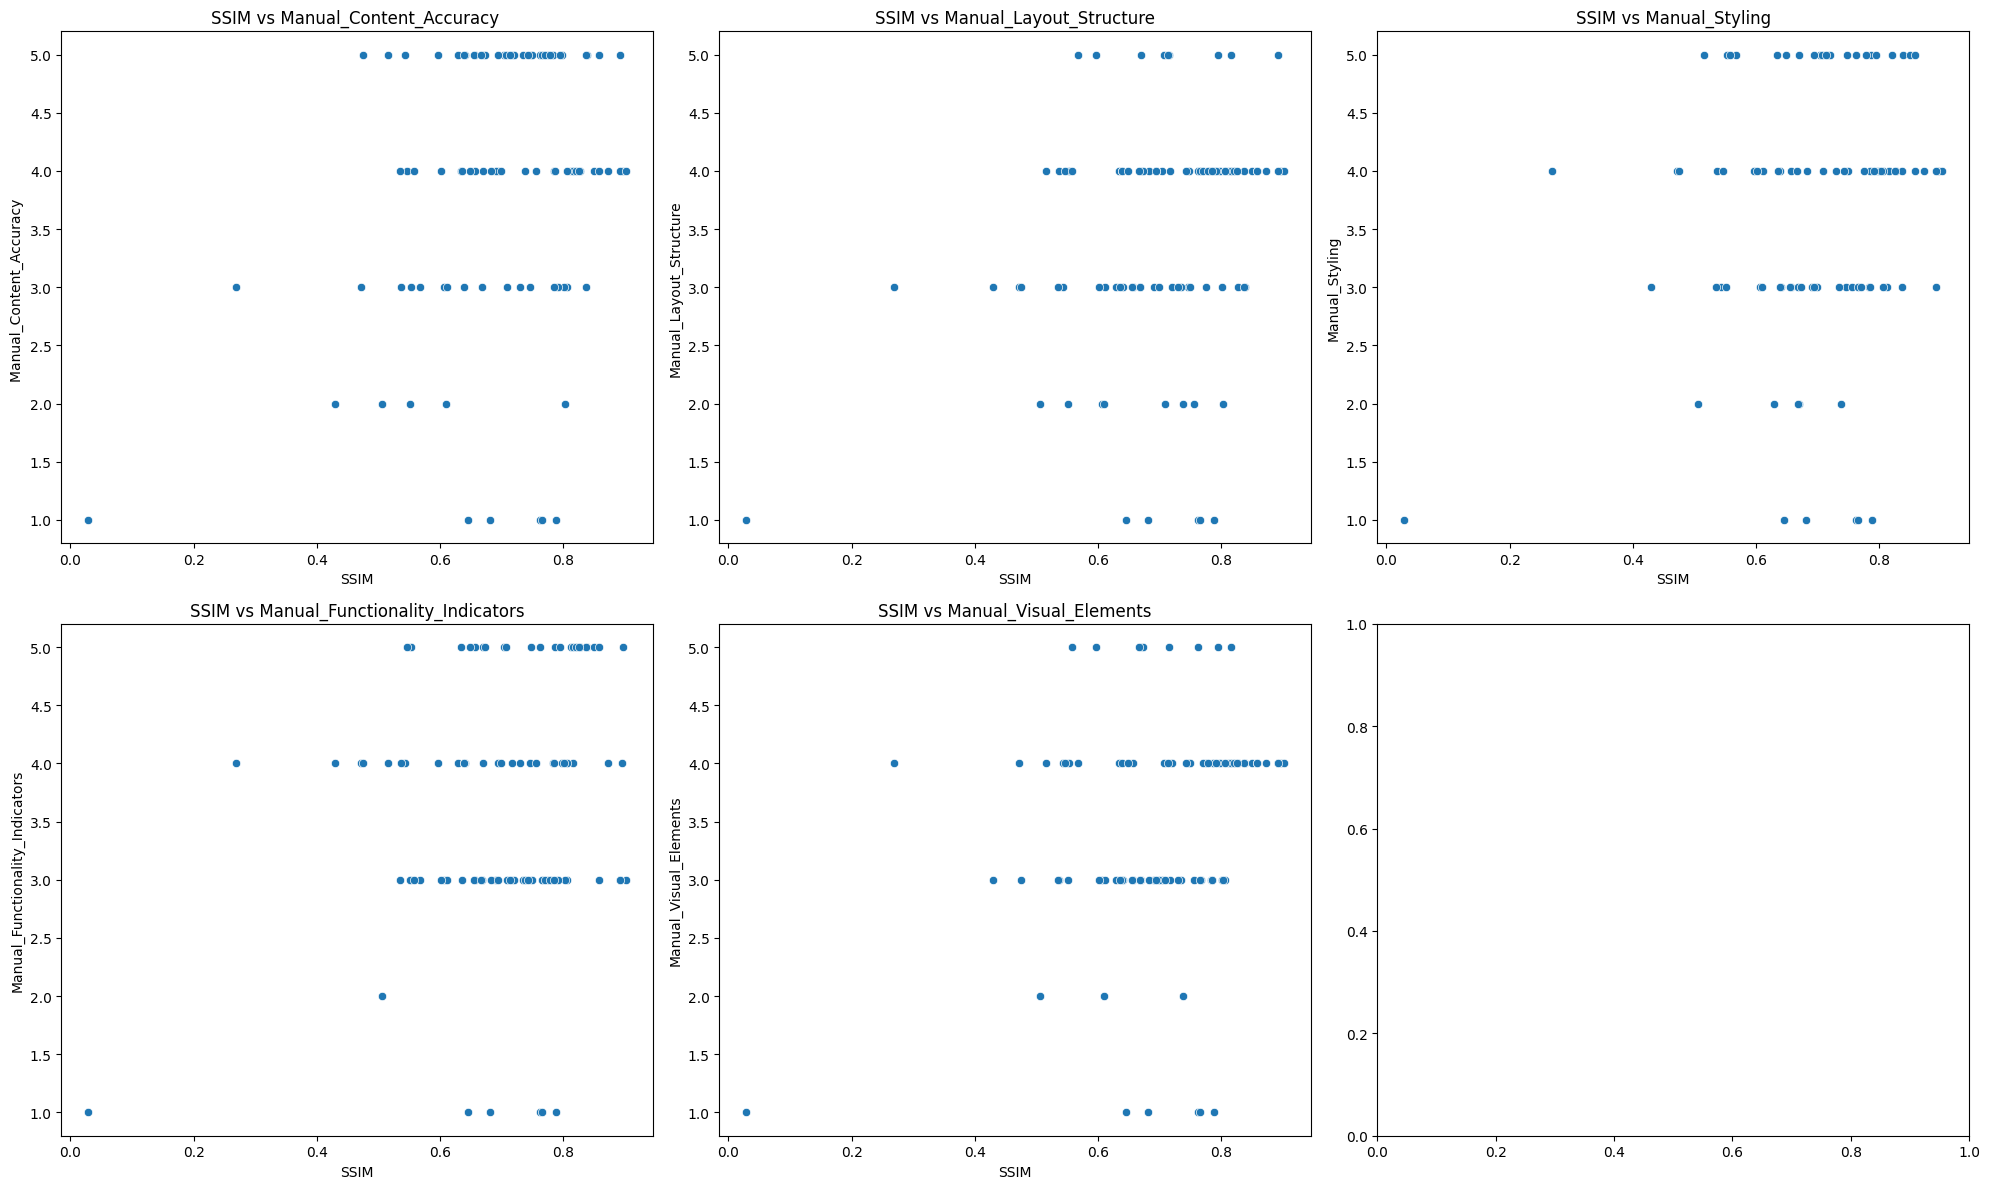

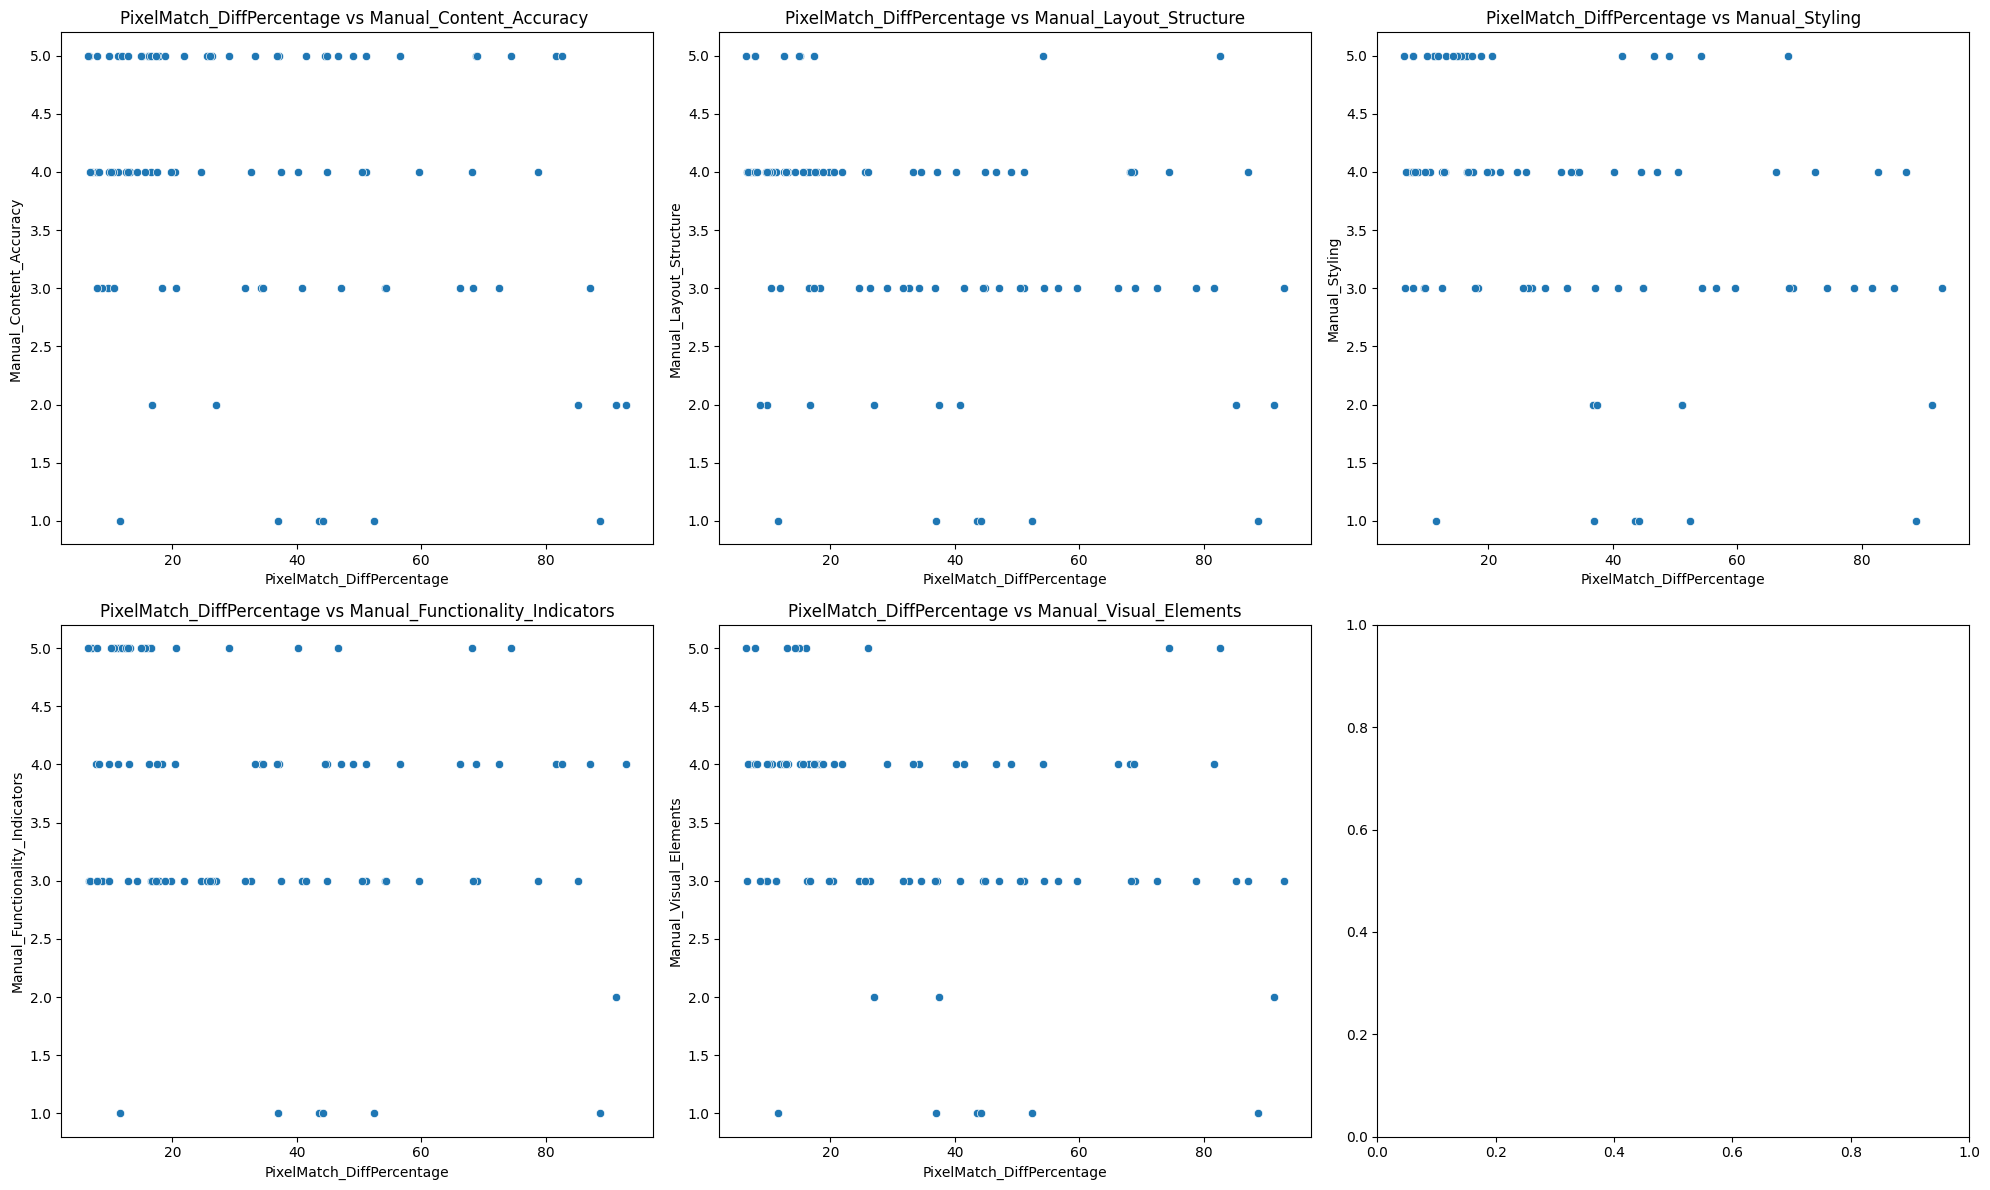

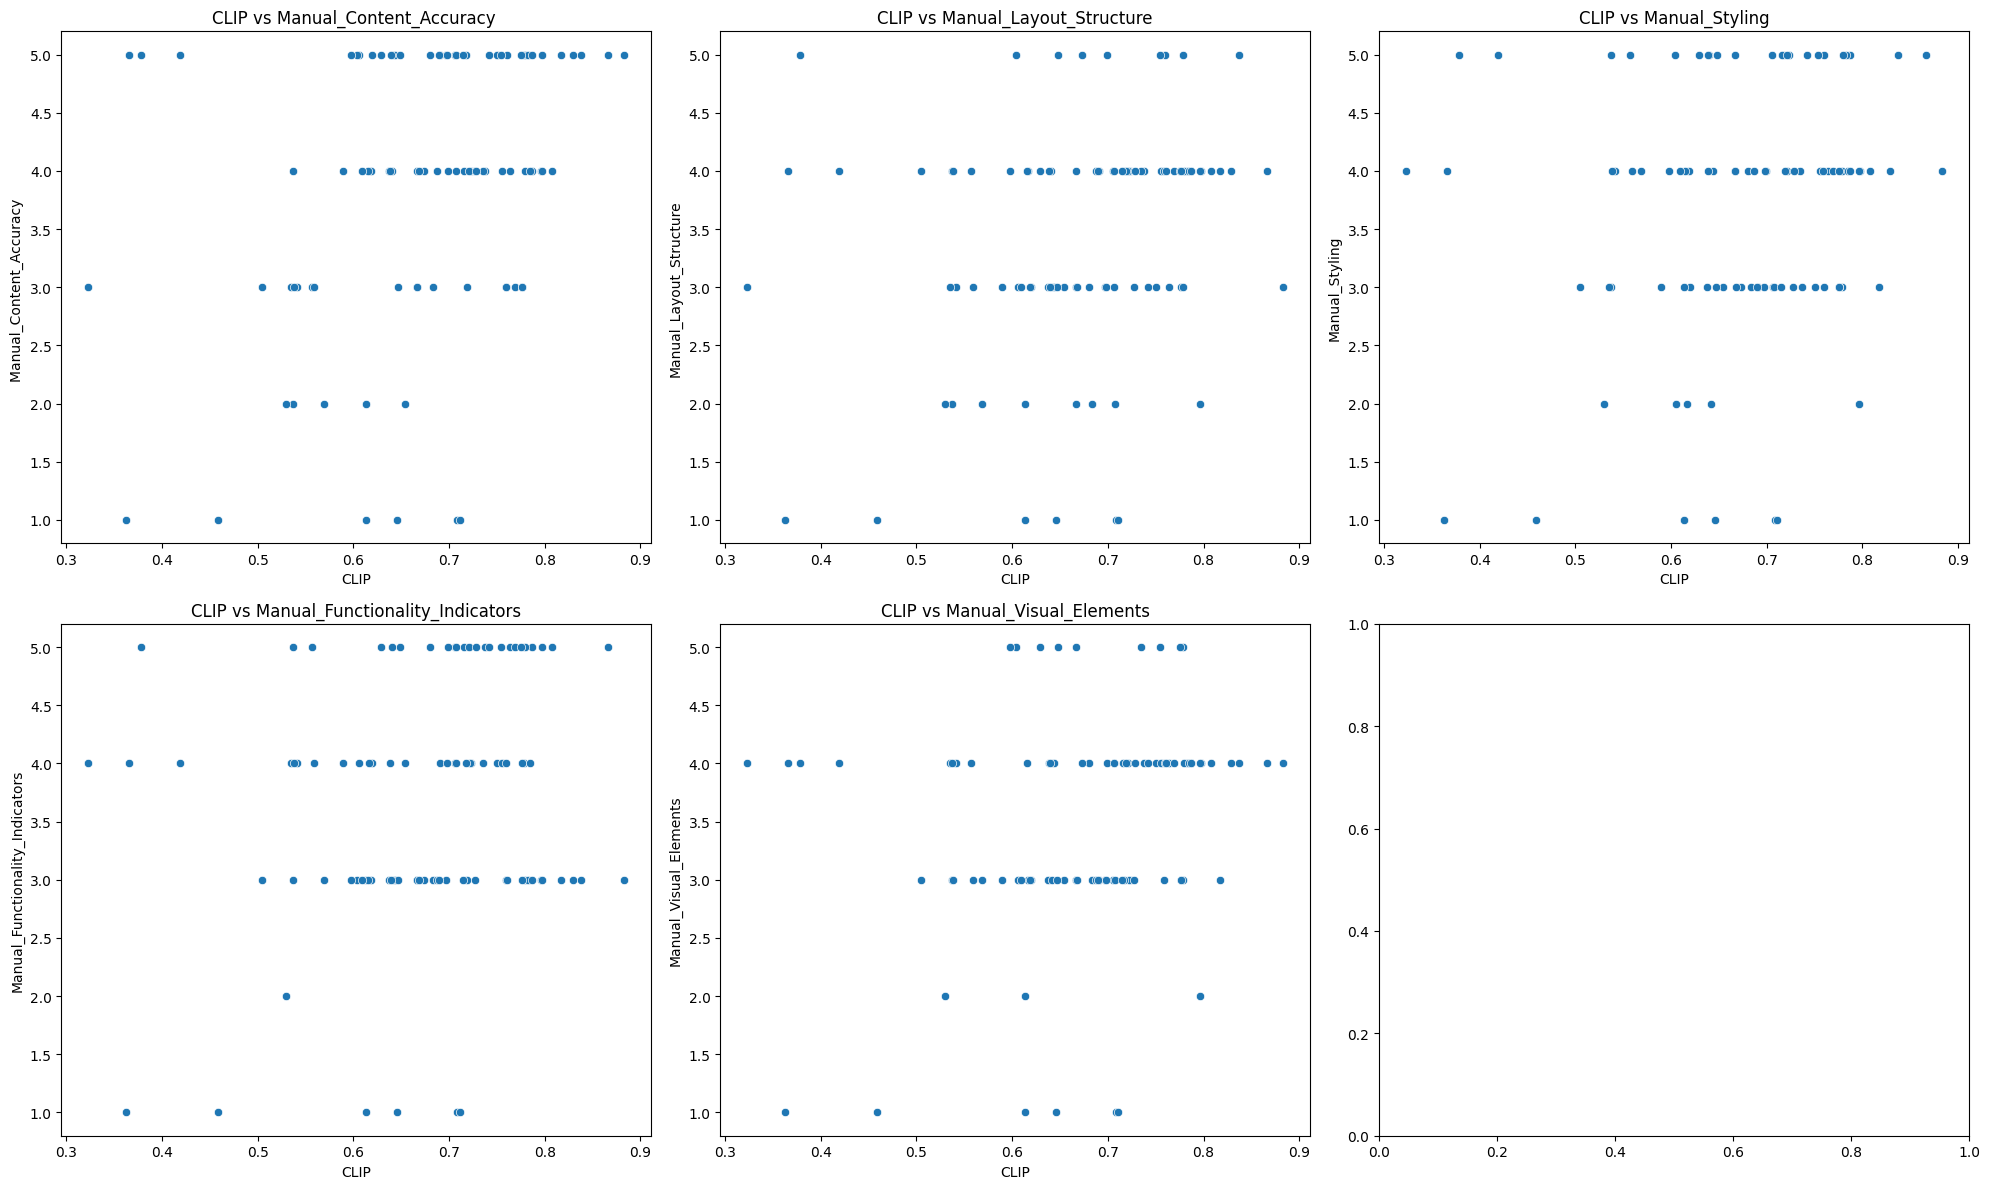

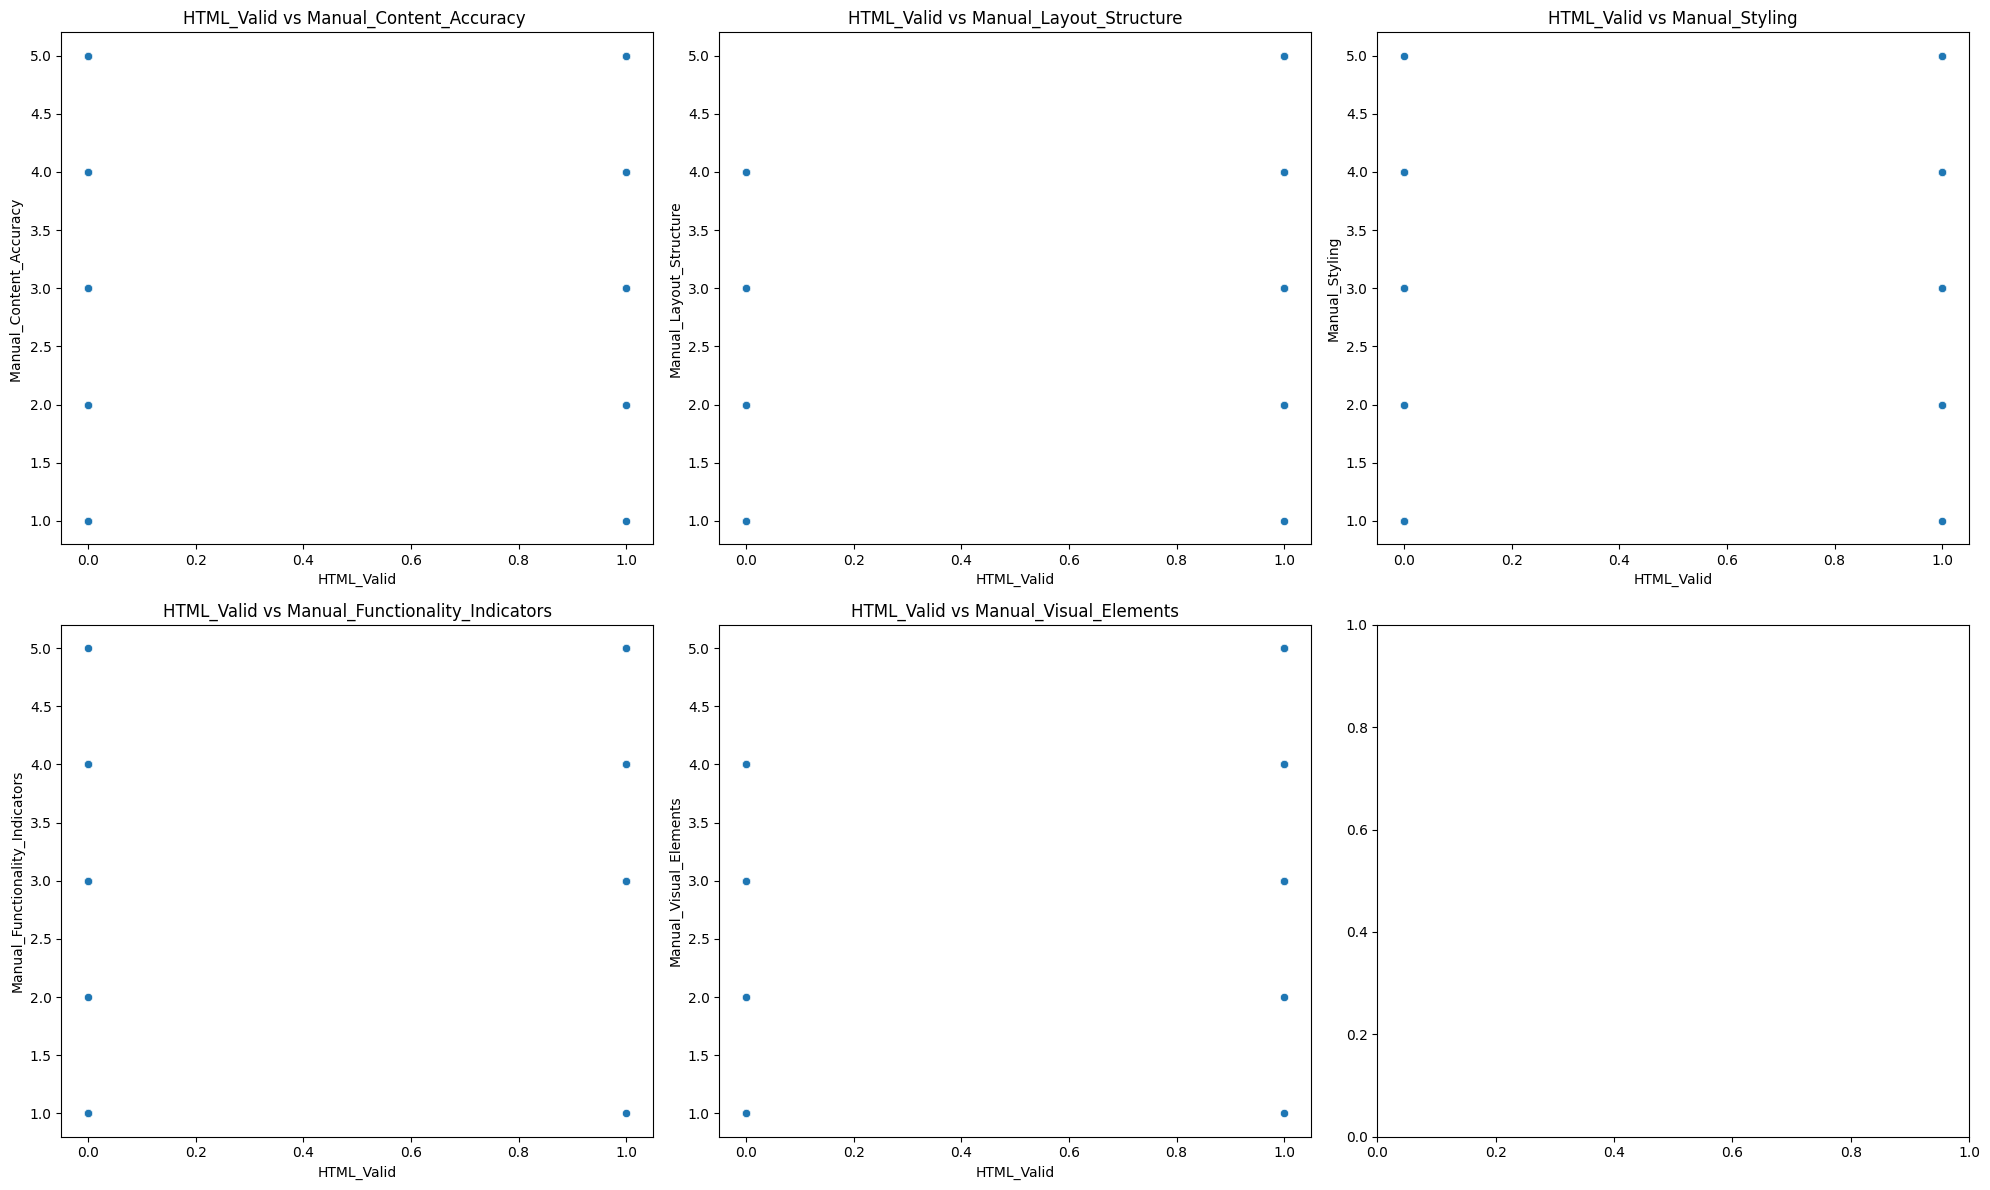

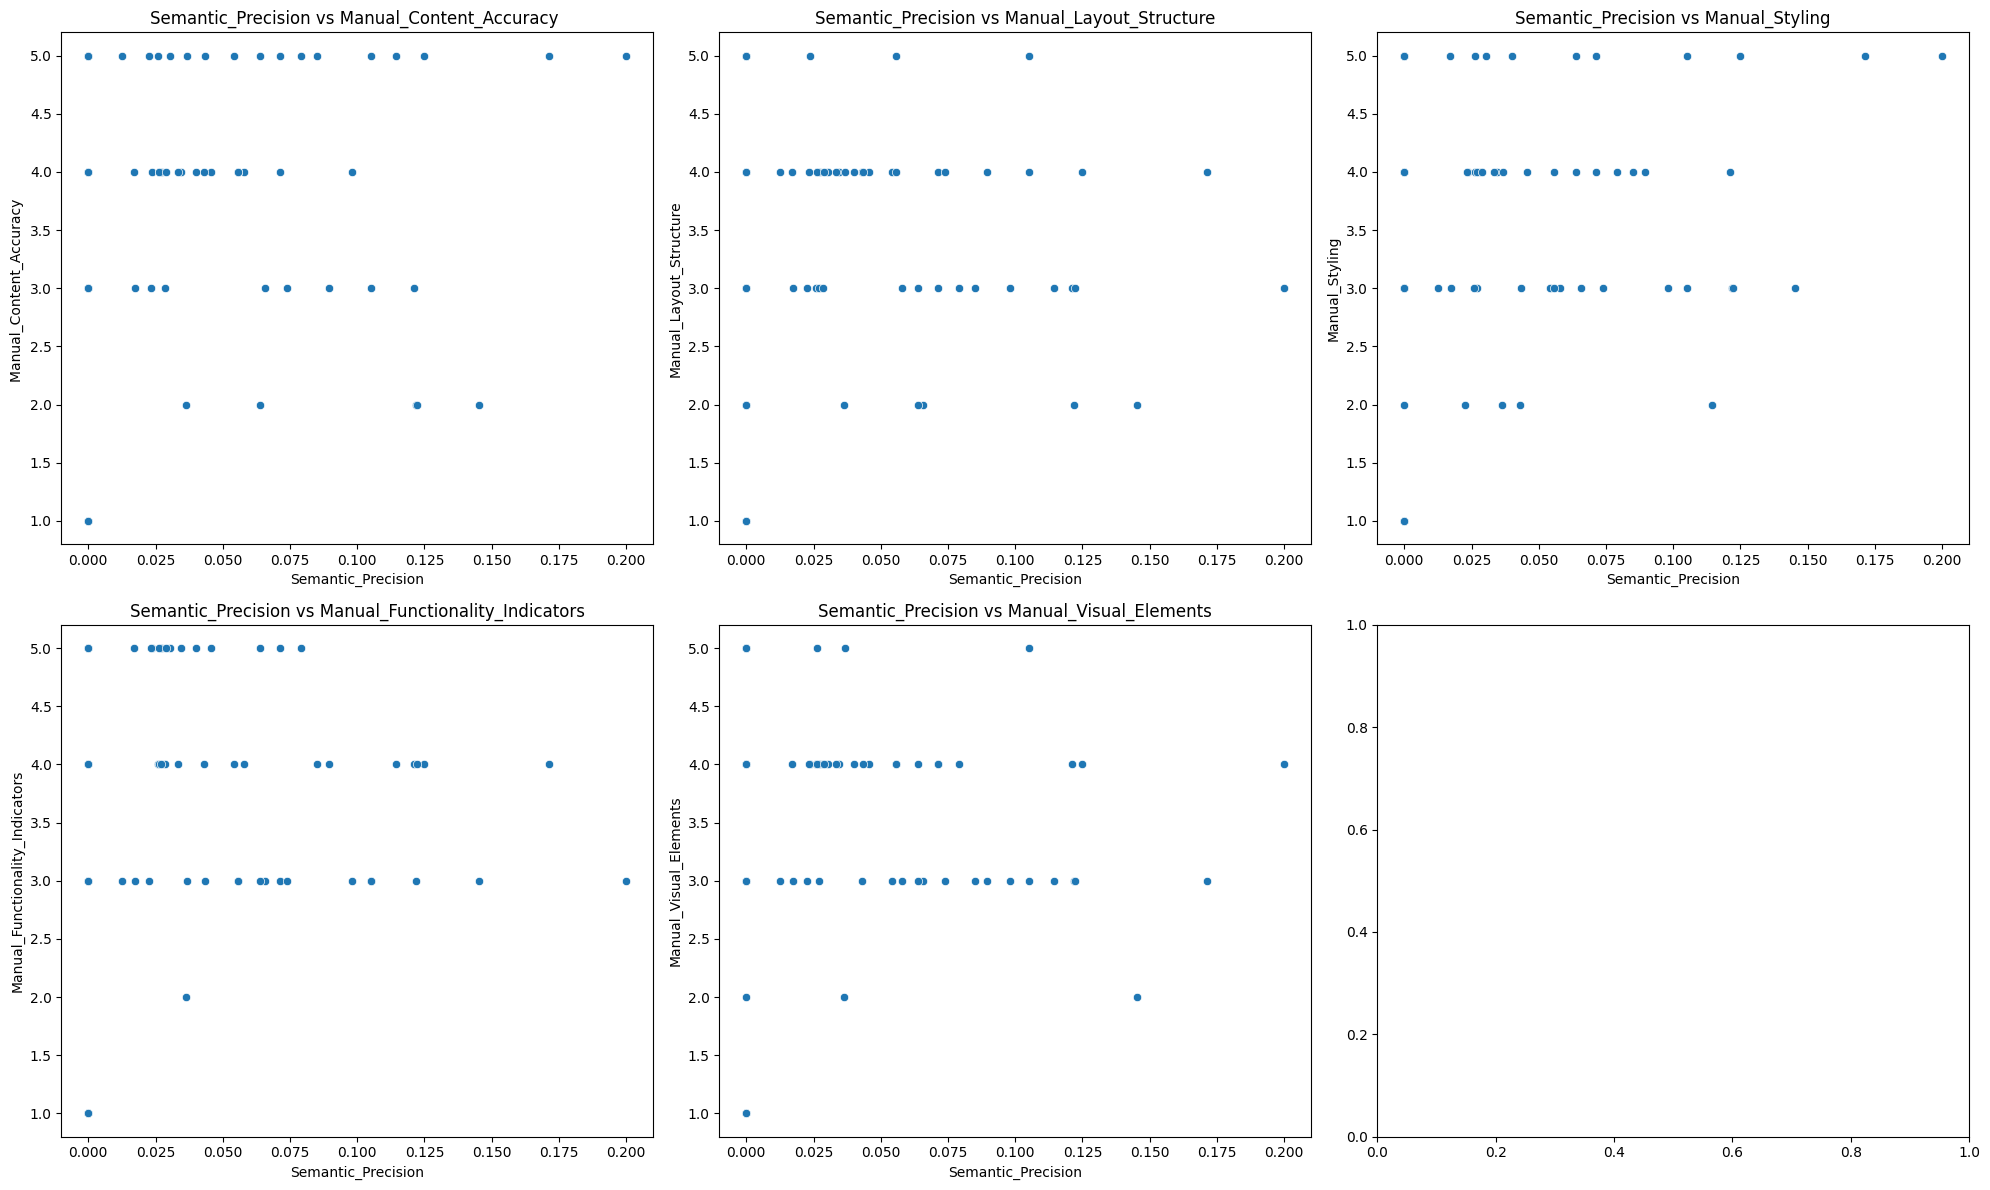

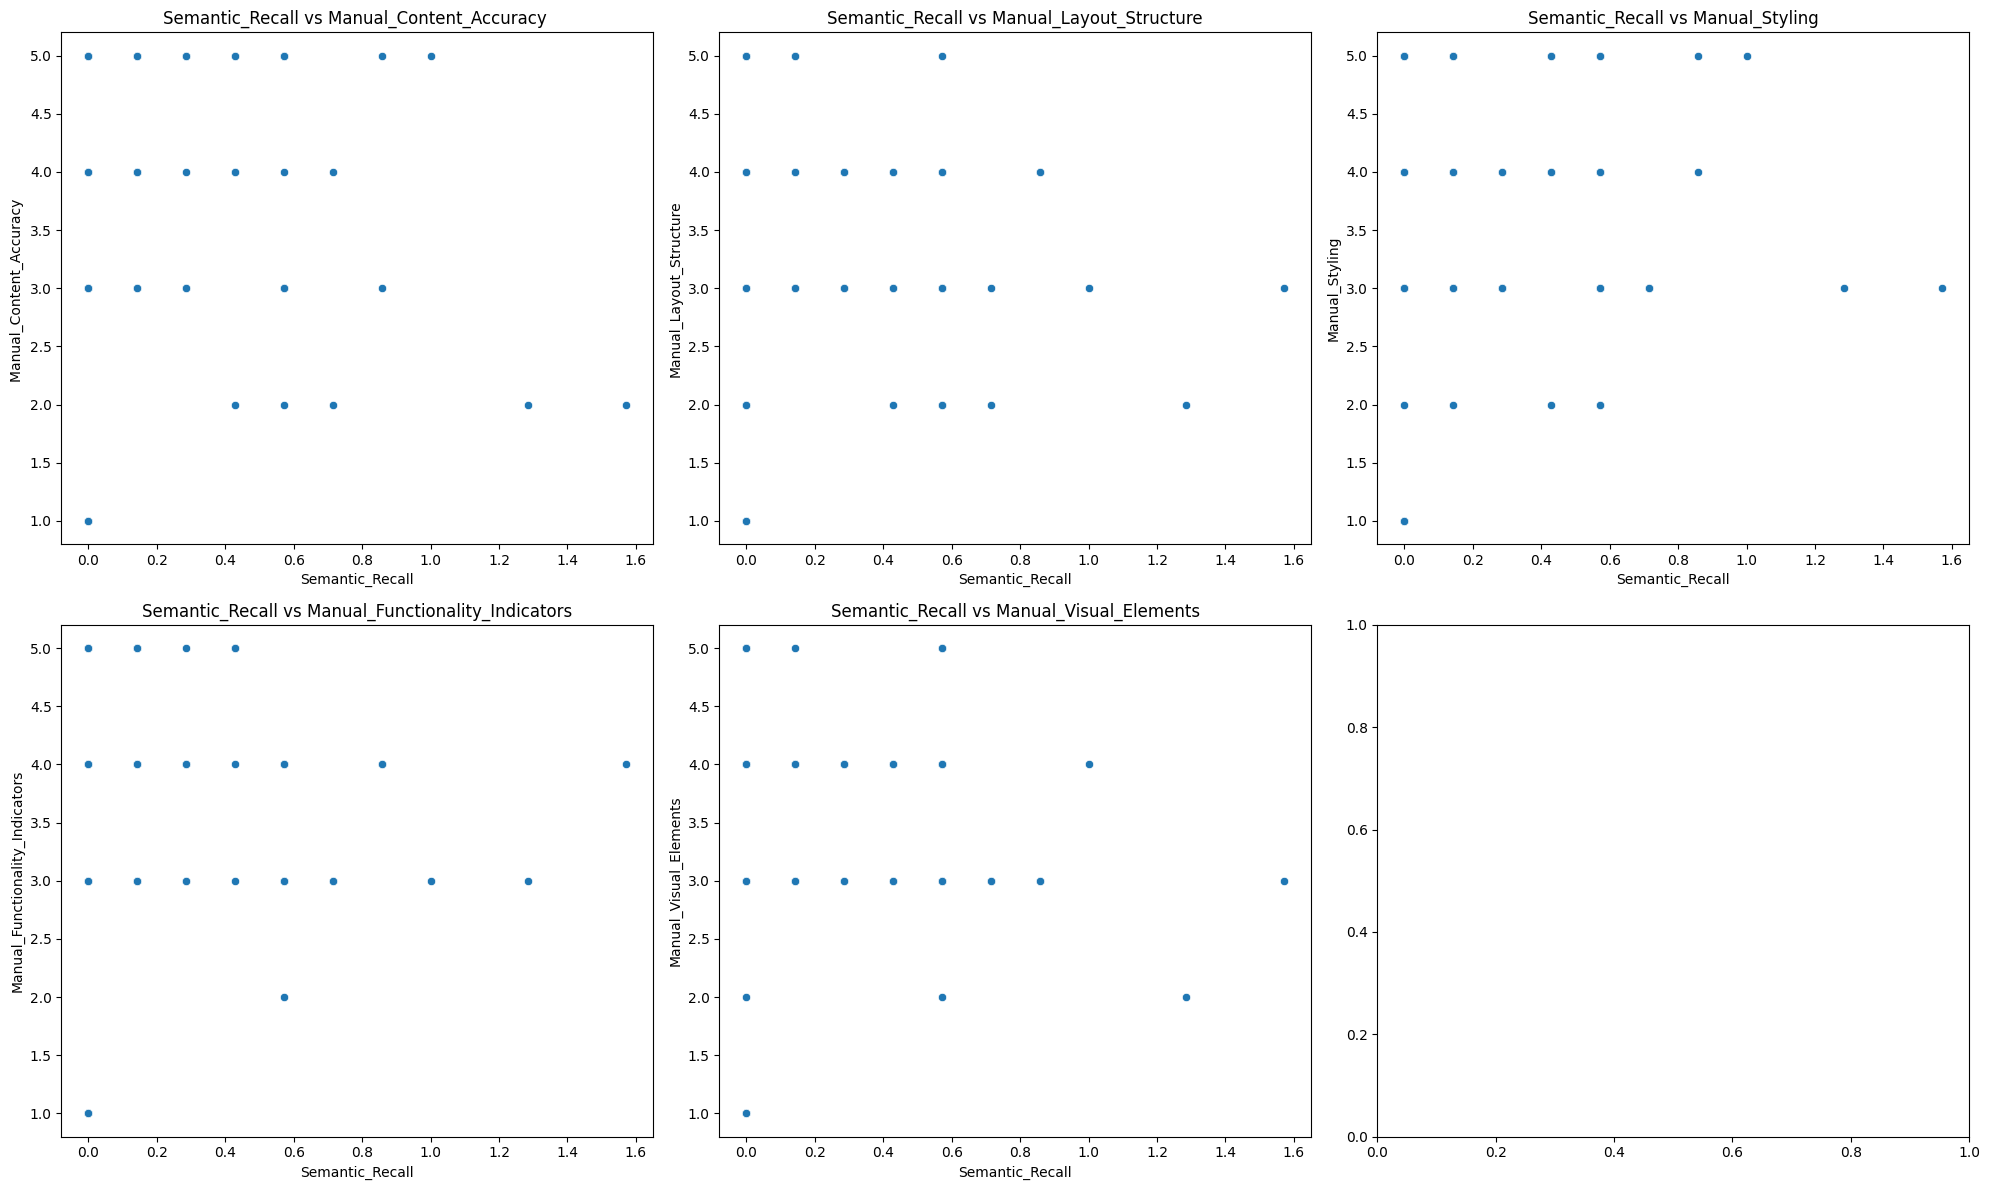


T-tests between automatic and manual metrics:
SSIM vs Manual_Content_Accuracy : t-statistic = -27.0283, p-value = 0.0000
SSIM vs Manual_Layout_Structure: t-statistic = -26.8439, p-value = 0.0000
SSIM vs Manual_Styling: t-statistic = -26.3996, p-value = 0.0000
SSIM vs Manual_Functionality_Indicators: t-statistic = -26.8486, p-value = 0.0000
SSIM vs Manual_Visual_Elements: t-statistic = -28.5578, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Content_Accuracy : t-statistic = 11.6865, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Layout_Structure: t-statistic = 11.8774, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Styling: t-statistic = 11.7879, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Functionality_Indicators: t-statistic = 11.7968, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Visual_Elements: t-statistic = 11.8701, p-value = 0.0000
CLIP vs Manual_Content_Accuracy : t-statistic = -27.3245, p-value = 0.0000
CLIP vs Manual_Layout_Structure: t-stati

In [ ]:

correlation_matrix = data[auto_metrics + manual_metrics].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Automatic vs Manual Metrics')
plt.tight_layout()
plt.show()

#  Scatter plots for each automatic metric vs manual metrics
for auto in auto_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    for i, manual in enumerate(manual_metrics):
        sns.scatterplot(data=data, x=auto, y=manual, ax=axes[i])
        axes[i].set_title(f'{auto} vs {manual}')
    plt.tight_layout()
    plt.show()

# 4. T-tests between automatic and manual metrics
print("\nT-tests between automatic and manual metrics:")
for auto in auto_metrics:
    for manual in manual_metrics:
        t_stat, p_value = stats.ttest_ind(data[auto], data[manual])
        print(f"{auto} vs {manual}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


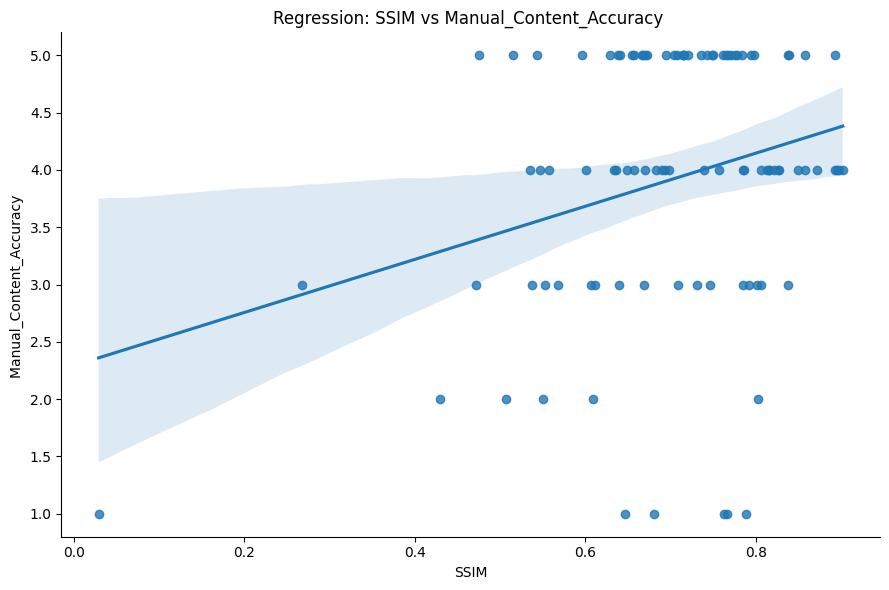

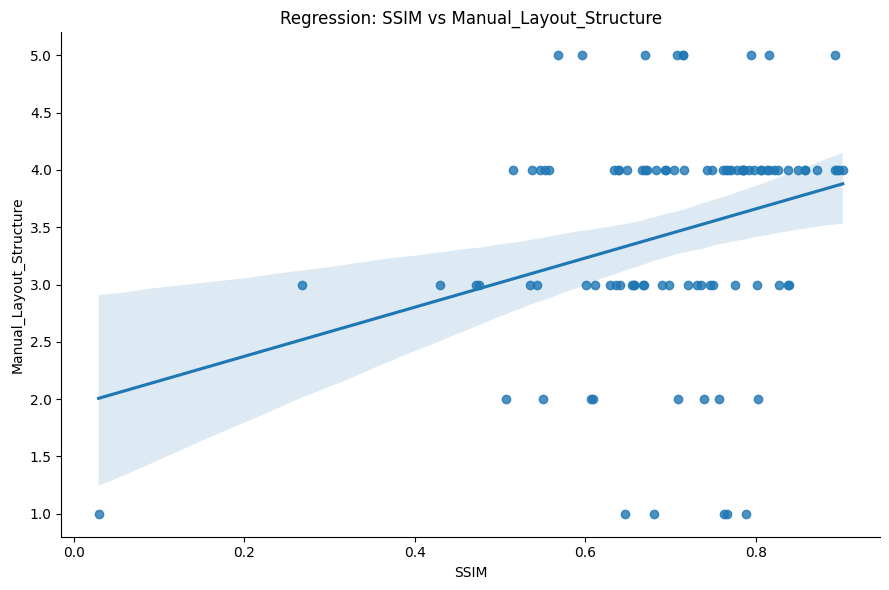

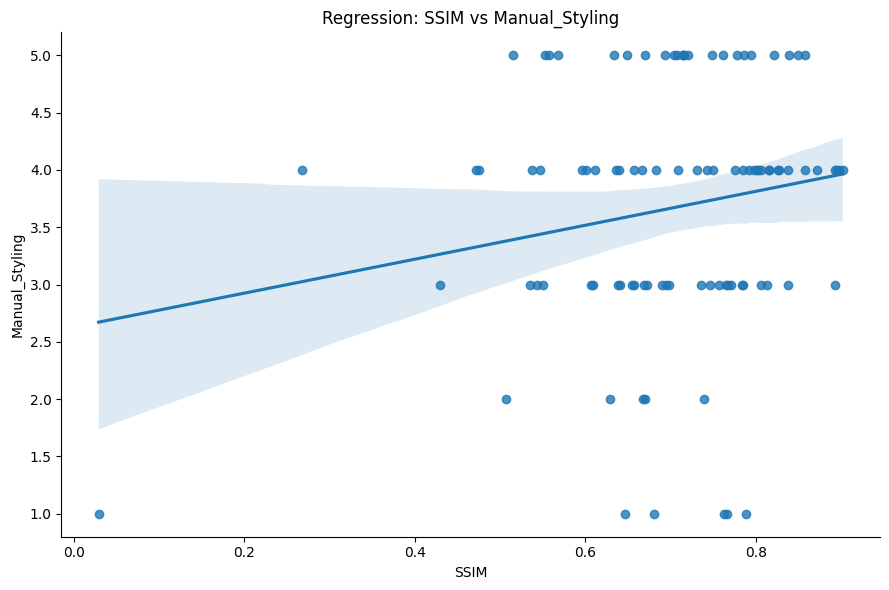

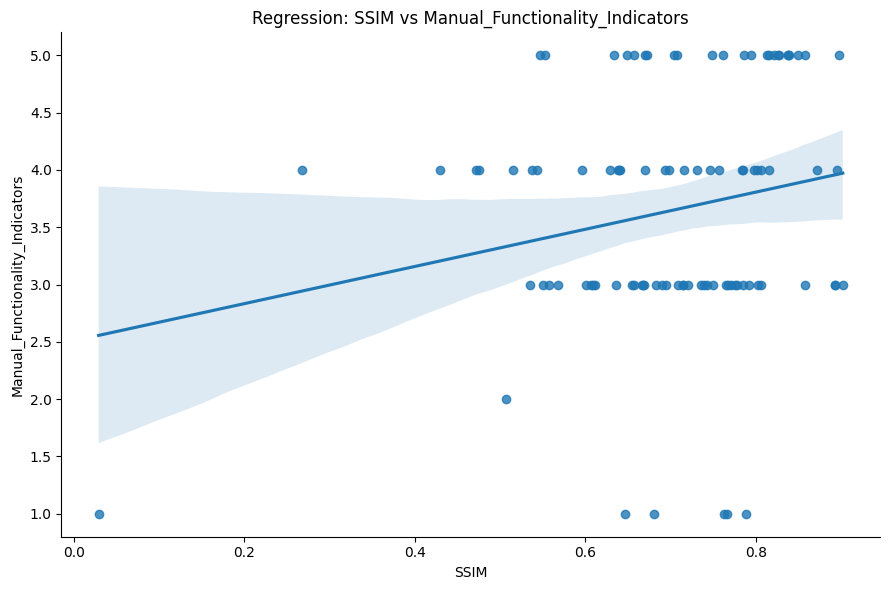

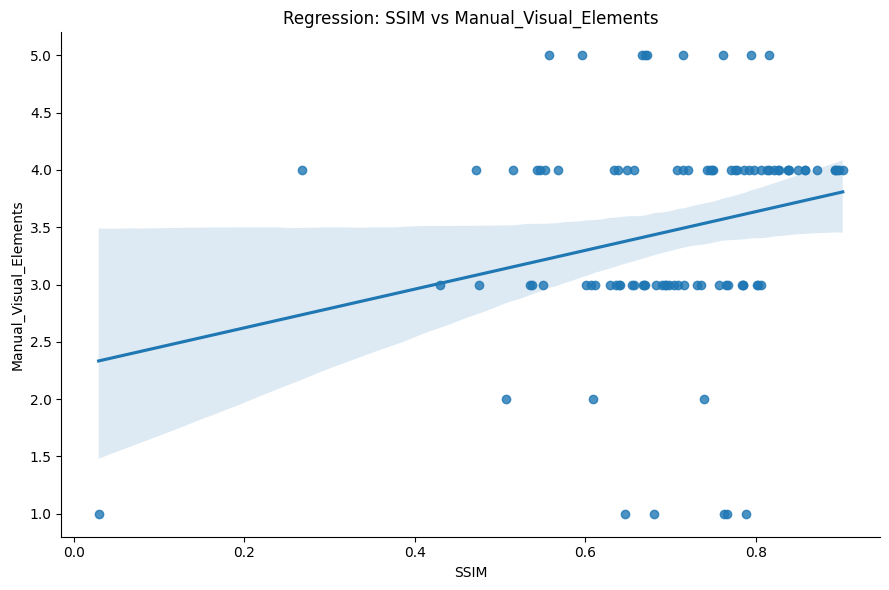

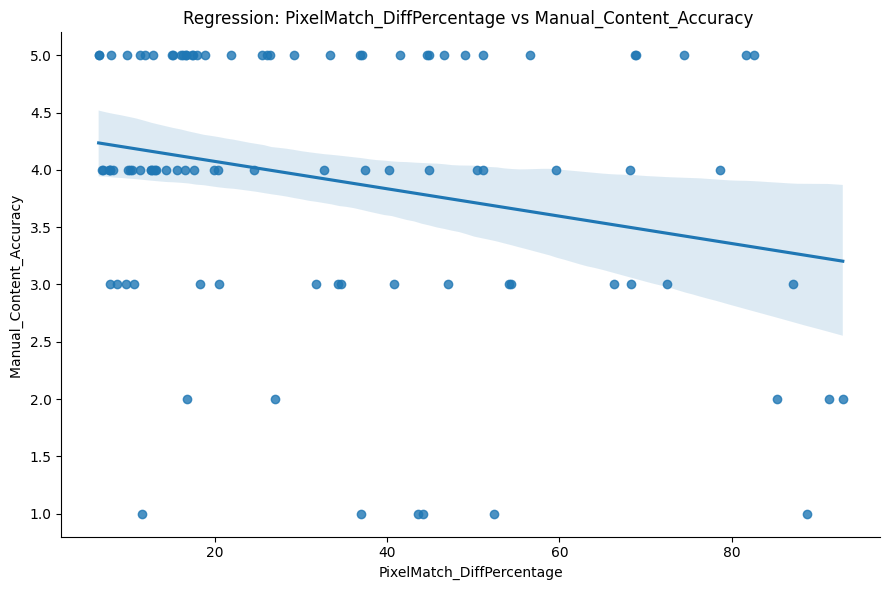

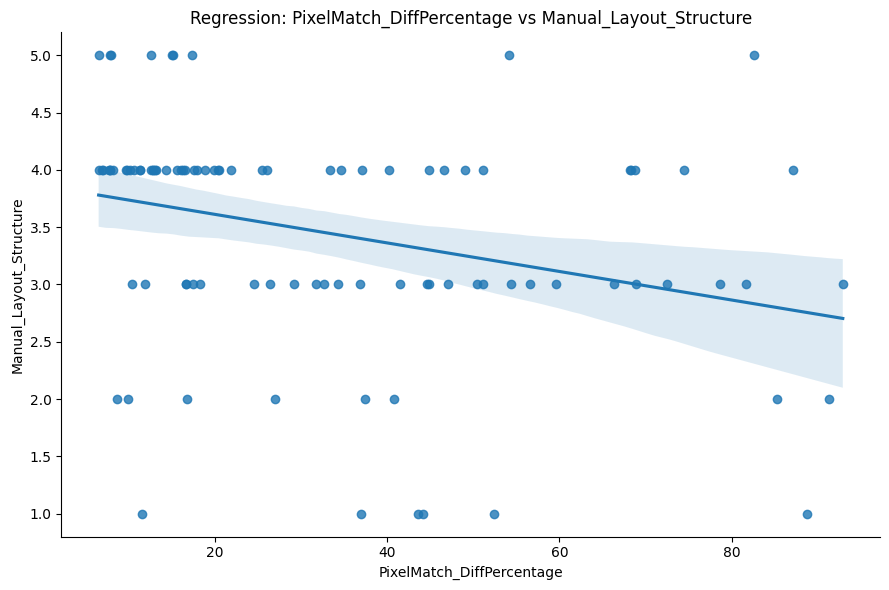

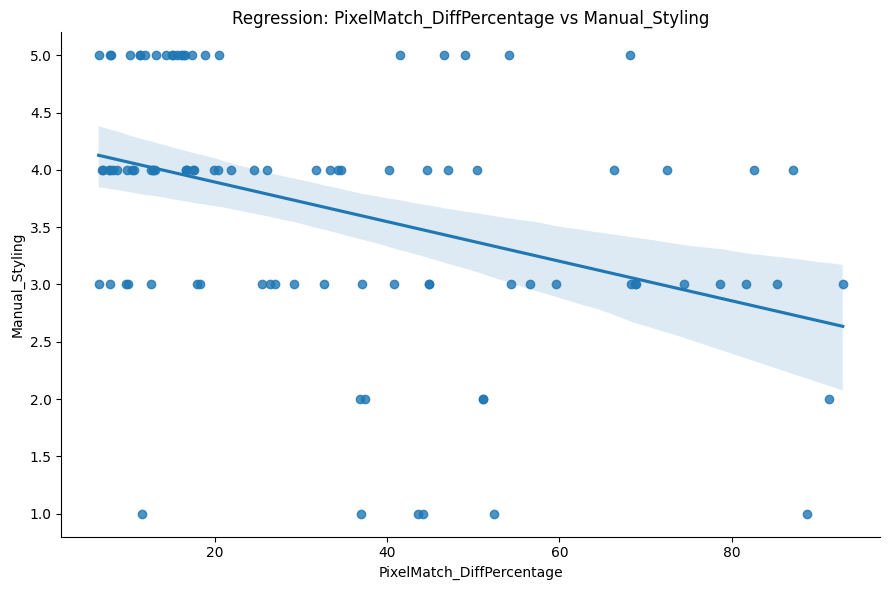

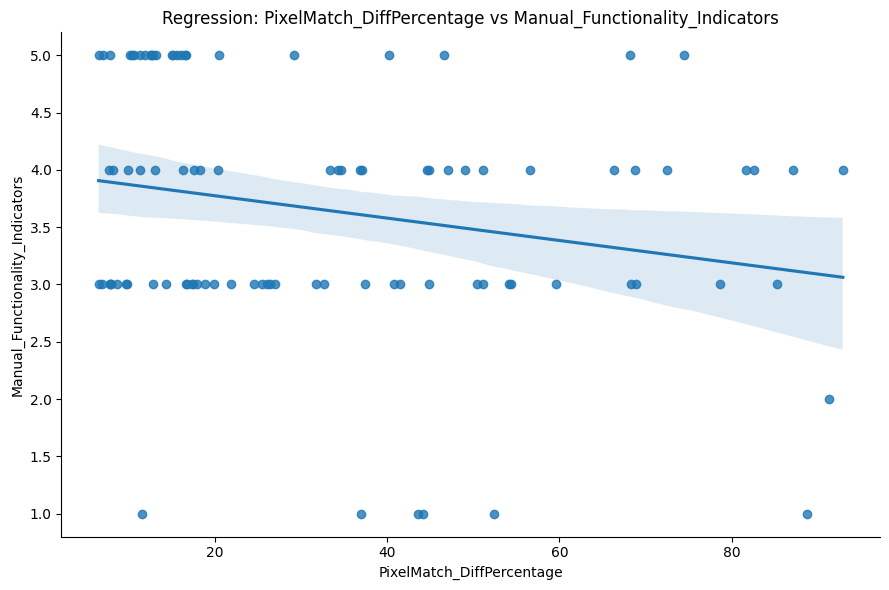

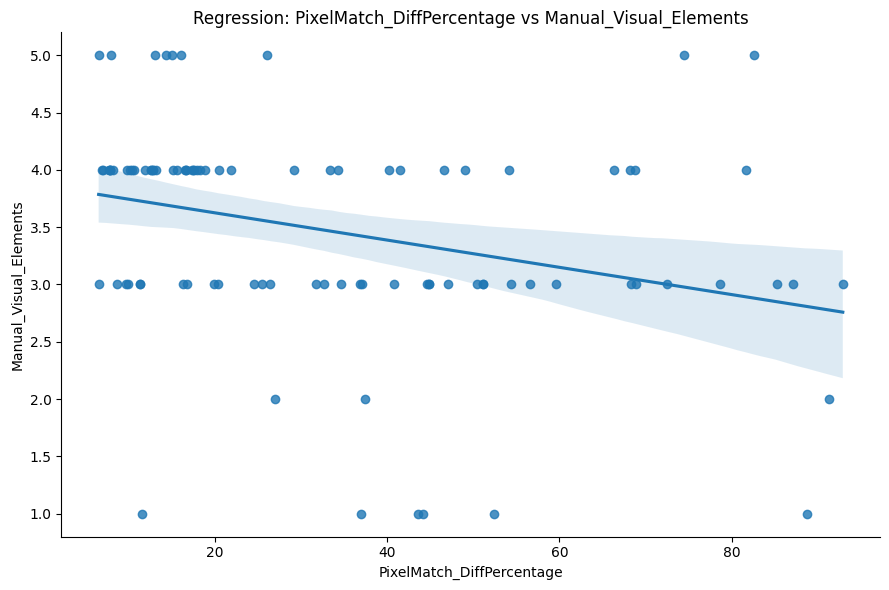

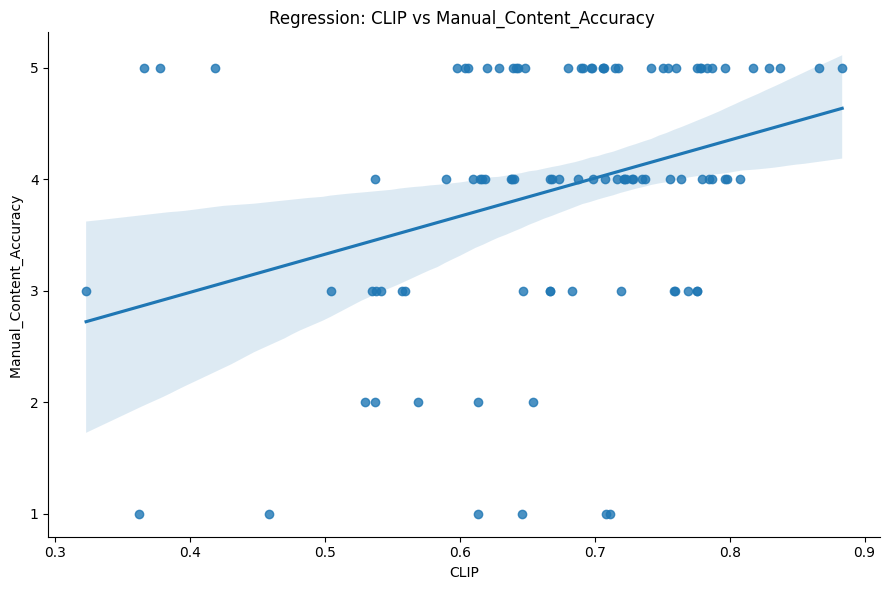

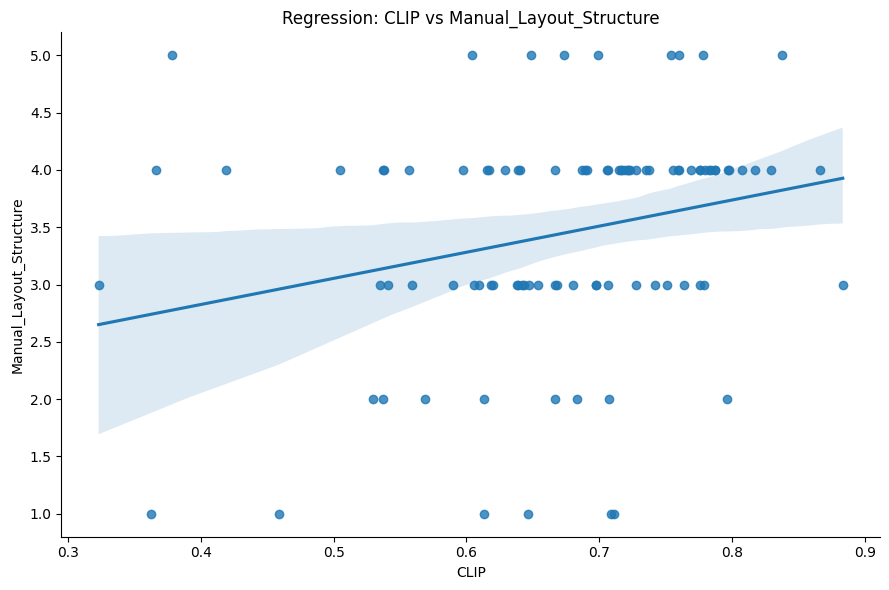

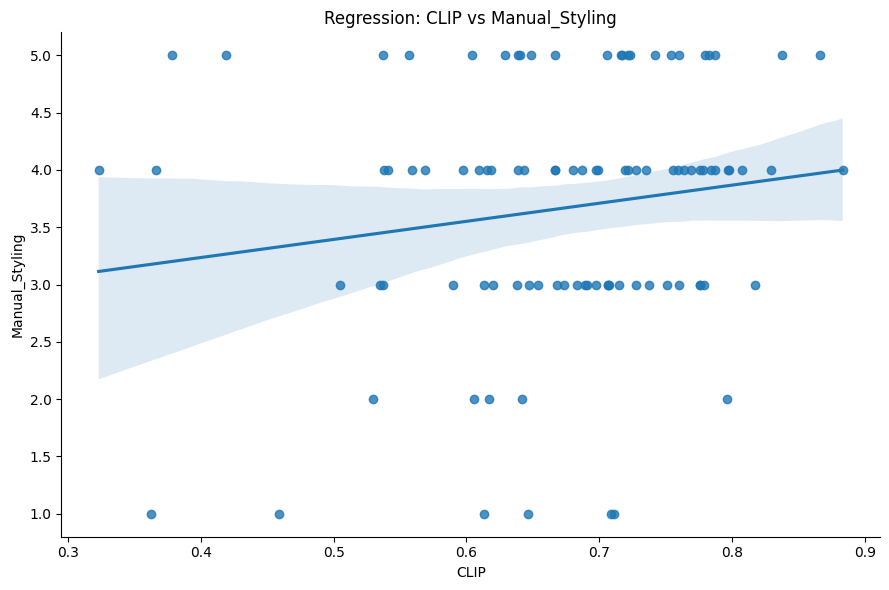

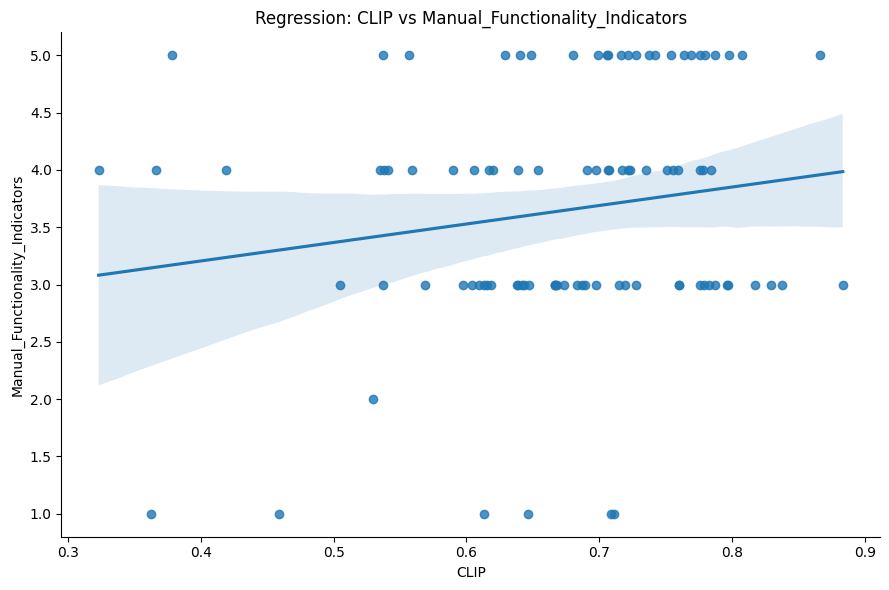

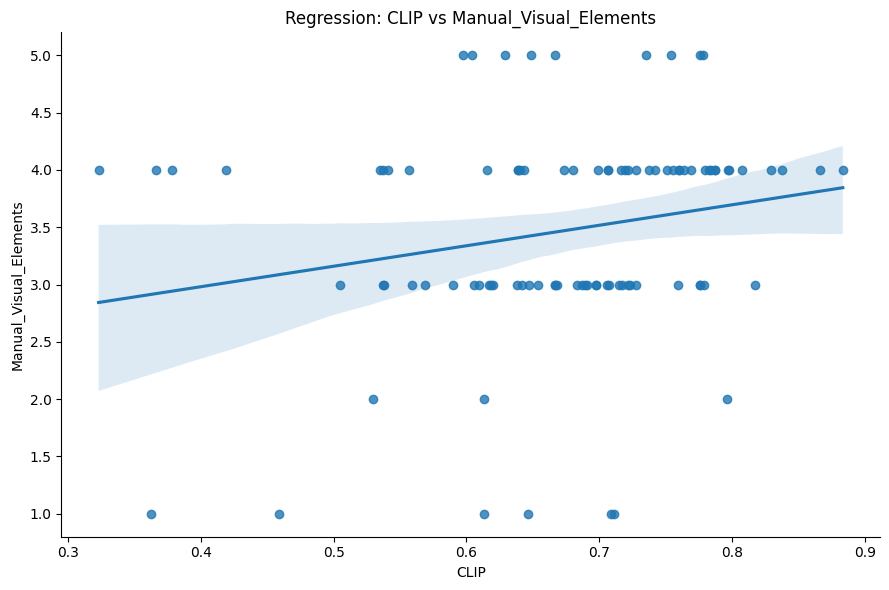

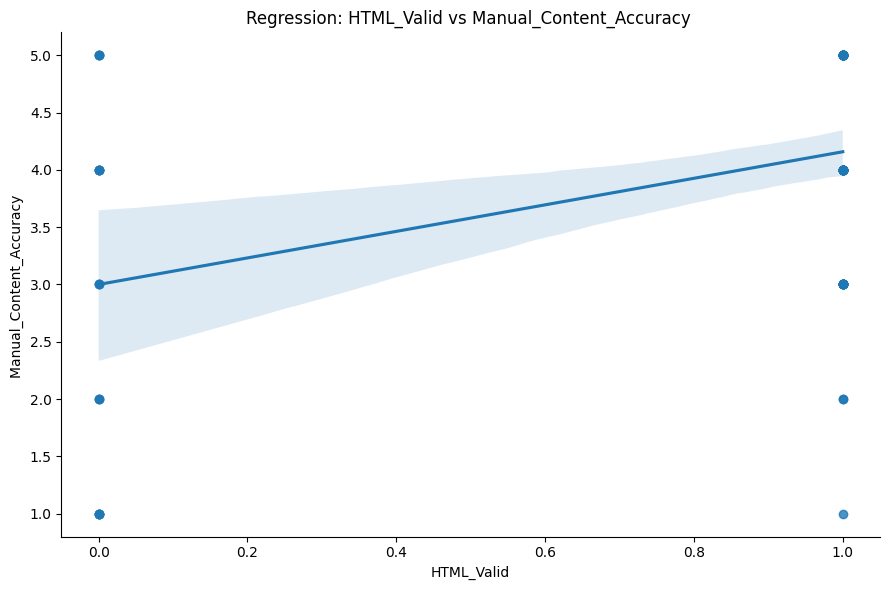

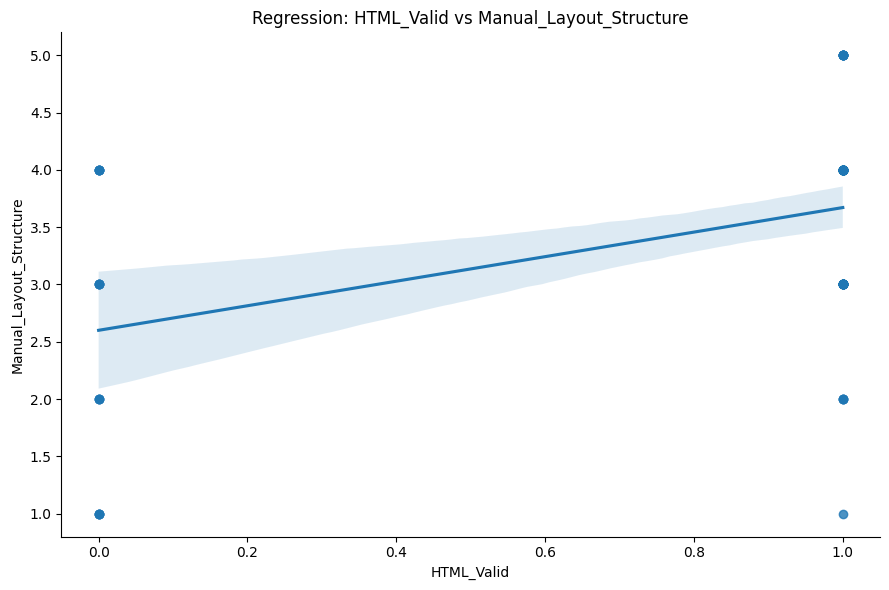

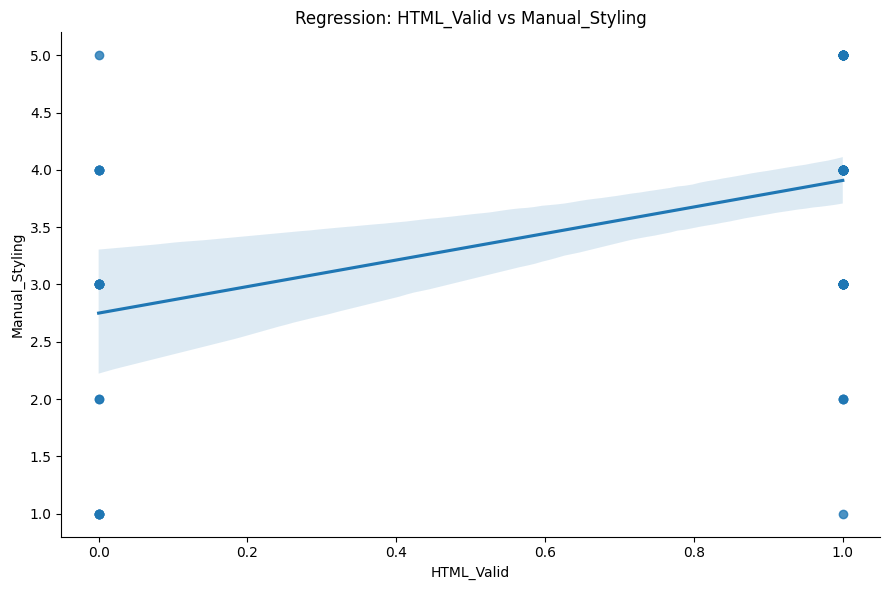

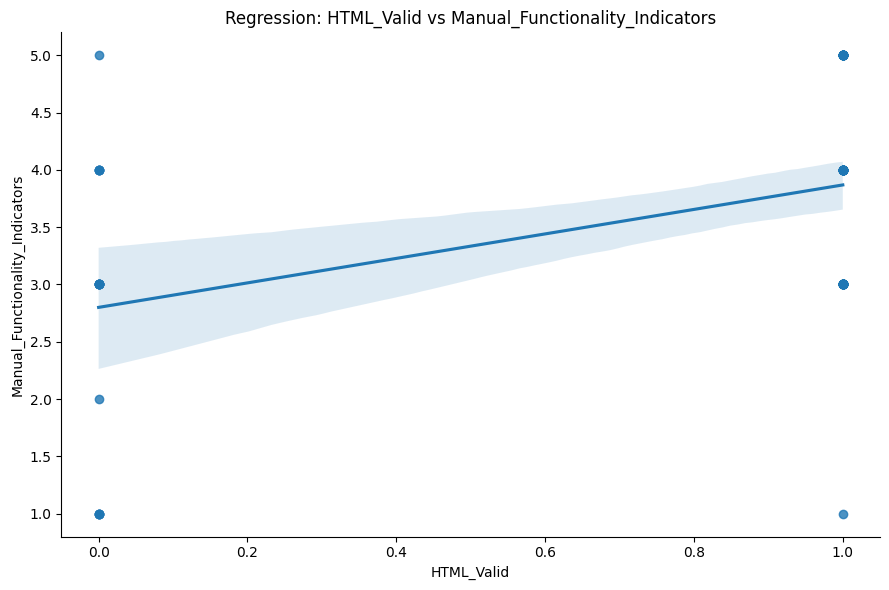

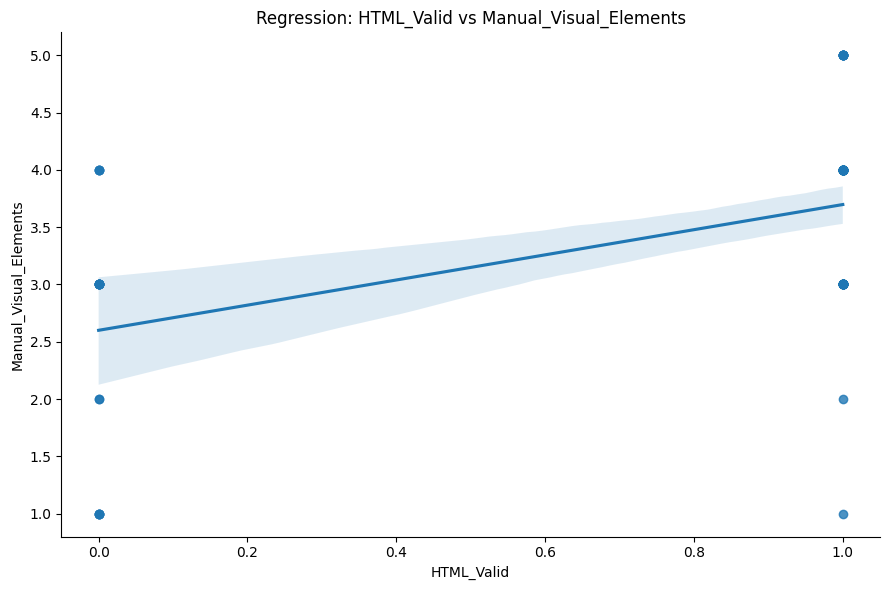

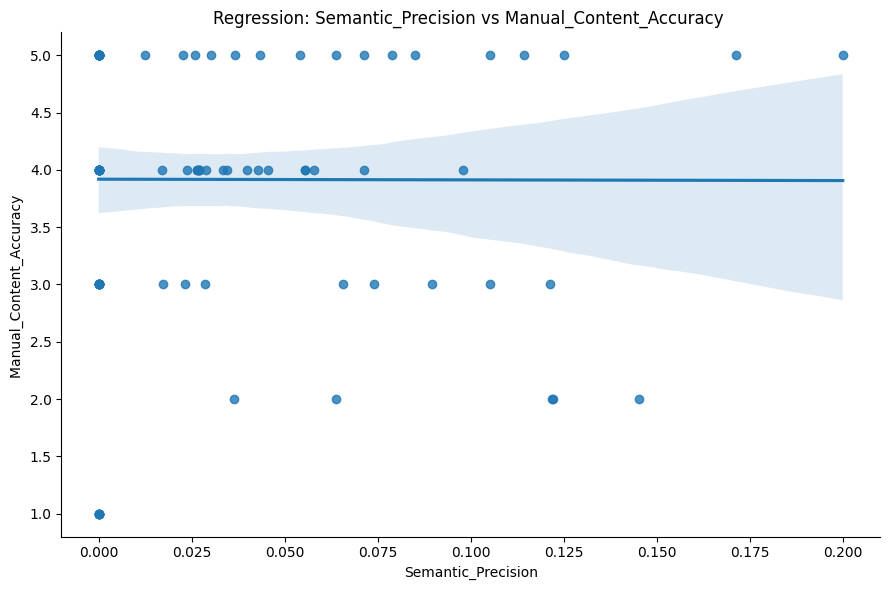

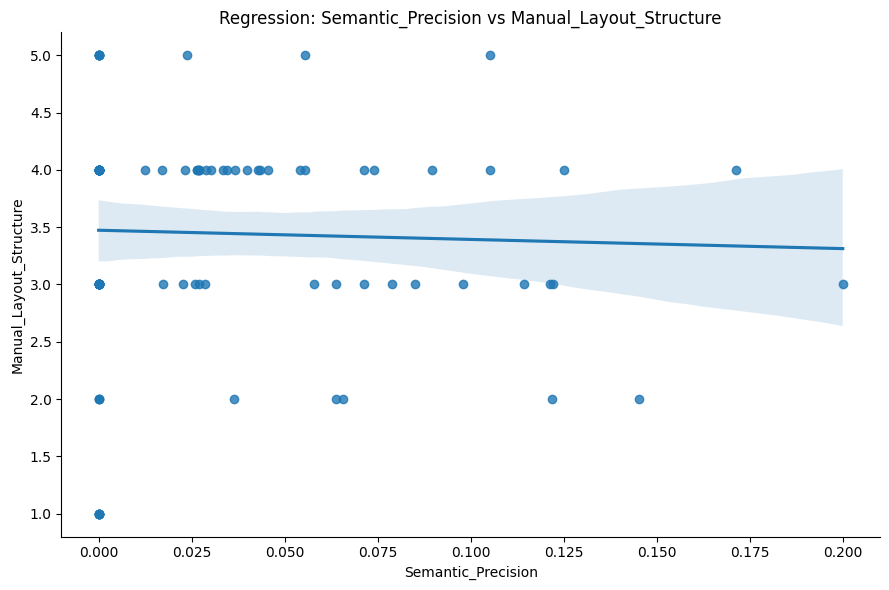

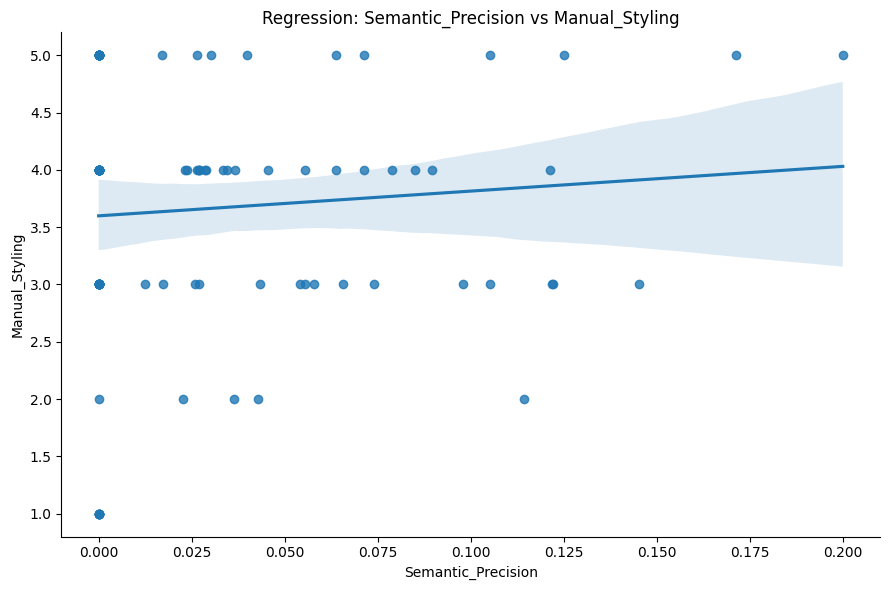

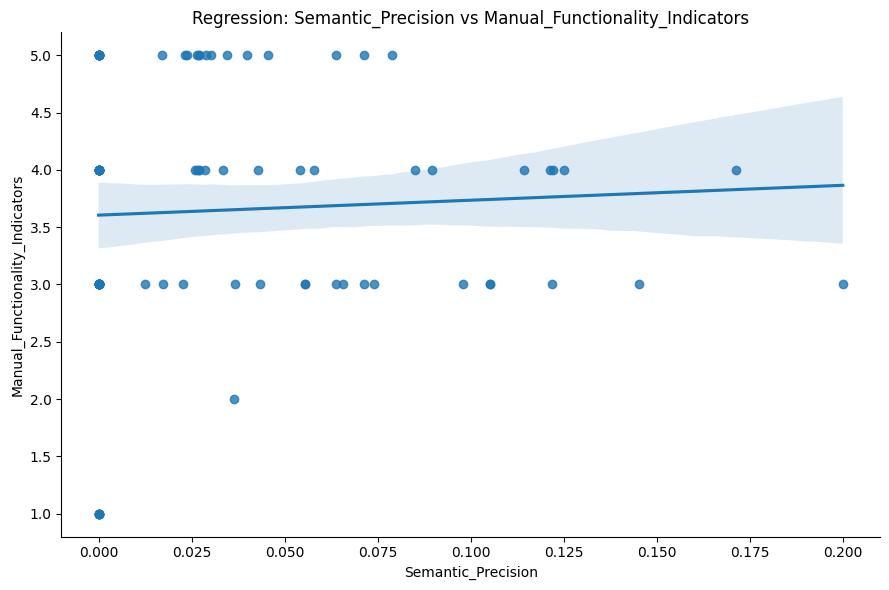

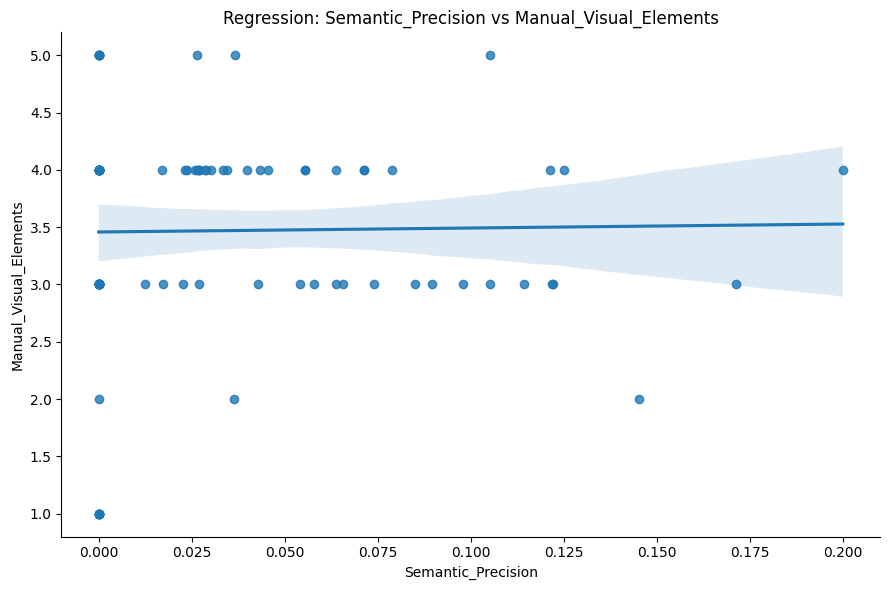

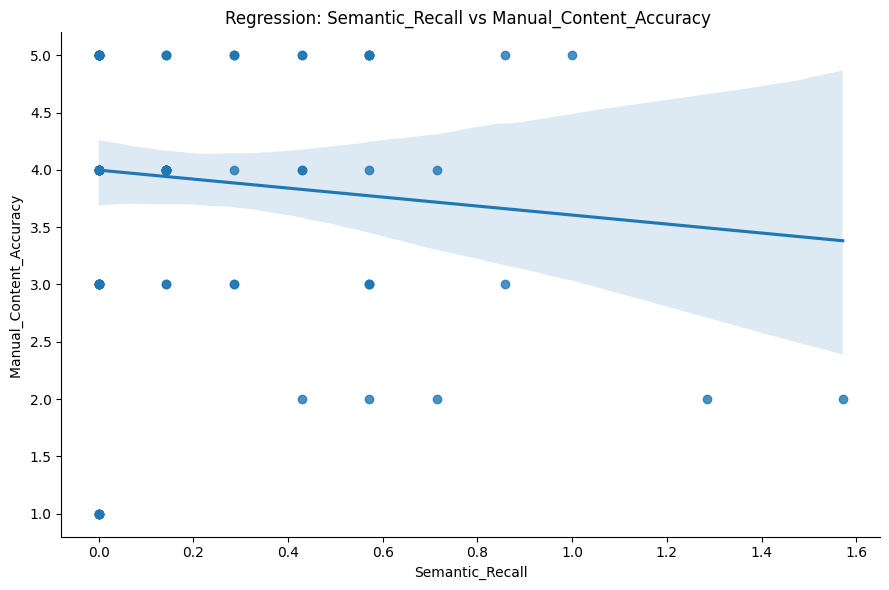

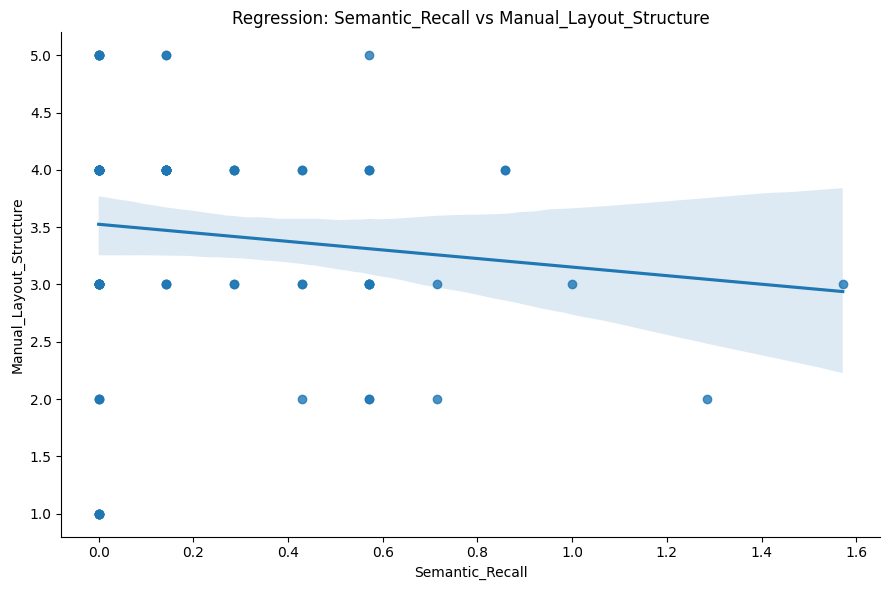

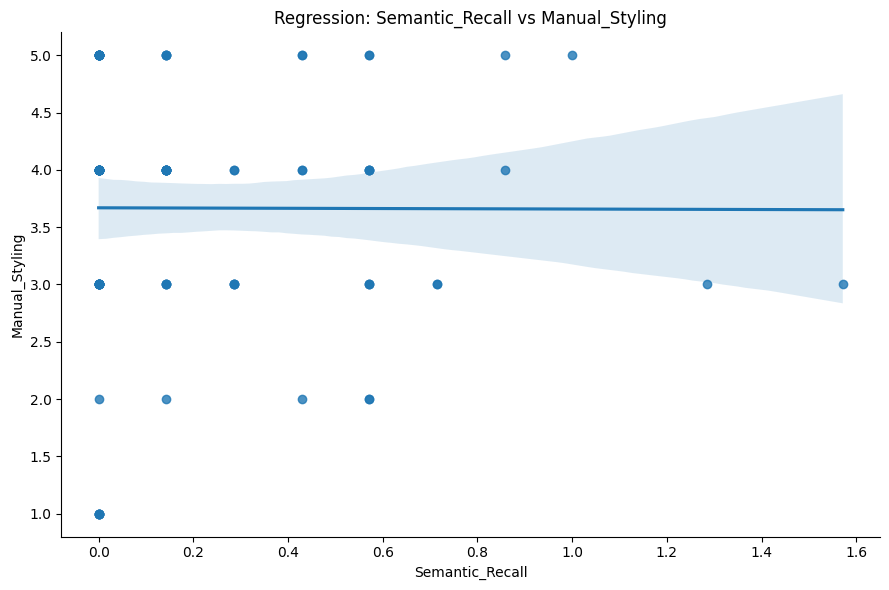

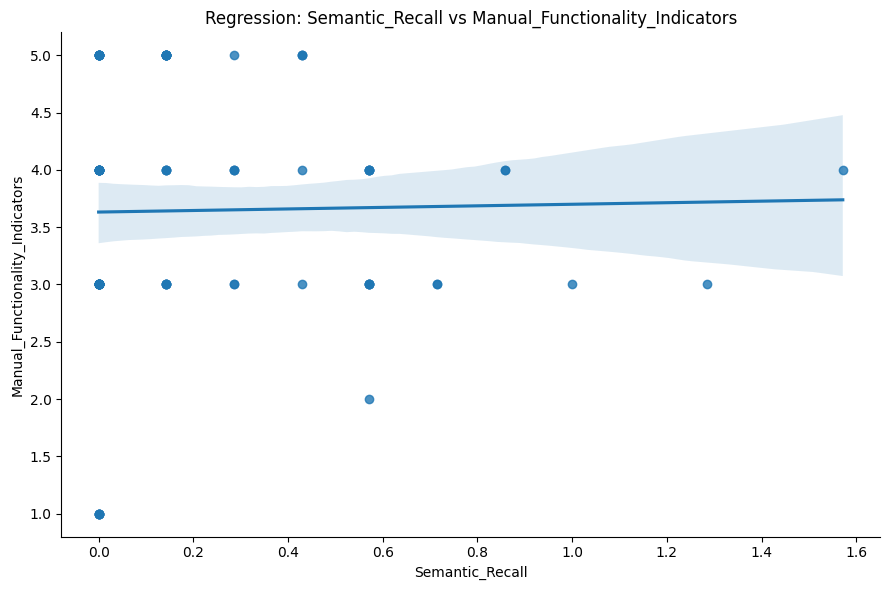

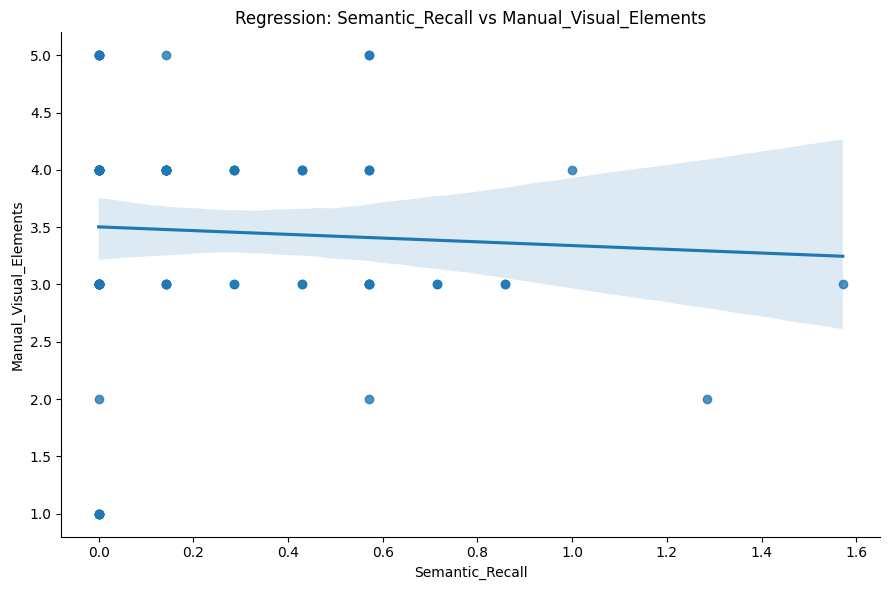

In [ ]:
for auto in auto_metrics:
    for manual in manual_metrics:
        sns.lmplot(x=auto, y=manual, data=data, height=6, aspect=1.5)
        plt.title(f'Regression: {auto} vs {manual}')
        plt.tight_layout()
        plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("\nMAE and RMSE between automatic and manual metrics:")
for auto in auto_metrics:
    for manual in manual_metrics:
        mae = mean_absolute_error(data[manual], data[auto])
        rmse = mean_squared_error(data[manual], data[auto], squared=False)
        print(f"{auto} vs {manual}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")



MAE and RMSE between automatic and manual metrics:
SSIM vs Manual_Content_Accuracy : MAE = 3.2156, RMSE = 3.4059
SSIM vs Manual_Layout_Structure: MAE = 2.7469, RMSE = 2.9089
SSIM vs Manual_Styling: MAE = 2.9656, RMSE = 3.1527
SSIM vs Manual_Functionality_Indicators: MAE = 2.9448, RMSE = 3.1233
SSIM vs Manual_Visual_Elements: MAE = 2.7677, RMSE = 2.9139
PixelMatch_DiffPercentage vs Manual_Content_Accuracy : MAE = 29.2301, RMSE = 38.2475
PixelMatch_DiffPercentage vs Manual_Layout_Structure: MAE = 29.6988, RMSE = 38.6103
PixelMatch_DiffPercentage vs Manual_Styling: MAE = 29.4801, RMSE = 38.5191
PixelMatch_DiffPercentage vs Manual_Functionality_Indicators: MAE = 29.5009, RMSE = 38.4186
PixelMatch_DiffPercentage vs Manual_Visual_Elements: MAE = 29.6780, RMSE = 38.5842
CLIP vs Manual_Content_Accuracy : MAE = 3.2436, RMSE = 3.4316
CLIP vs Manual_Layout_Structure: MAE = 2.7749, RMSE = 2.9381
CLIP vs Manual_Styling: MAE = 2.9936, RMSE = 3.1805
CLIP vs Manual_Functionality_Indicators: MAE = 2.9

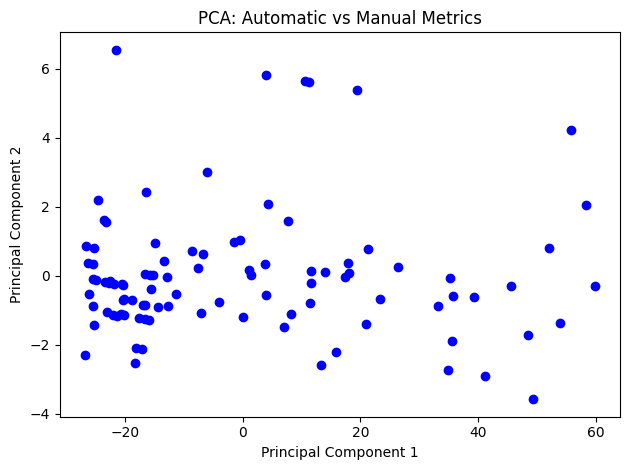

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data[auto_metrics + manual_metrics])
plt.scatter(pca_results[:, 0], pca_results[:, 1], c='b')
plt.title('PCA: Automatic vs Manual Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()
